#  Housing Project

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


## Pre-processing 

In [3]:
#checking the null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
# checking the shape of dataset
df.shape

(1168, 81)

In [4]:
# checking columns availabe in the dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

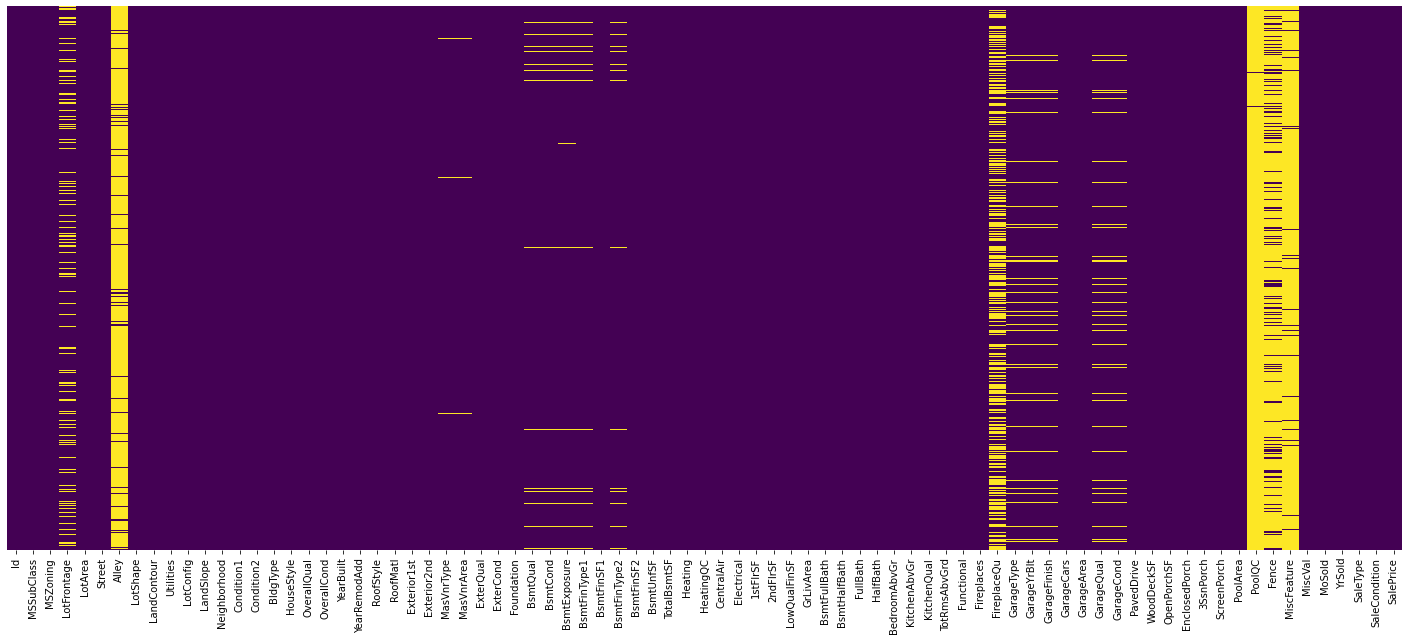

In [5]:
# checking all the nulls using the heatmap to get clear view
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

### Dropping columns which has more than 50% of null values

In [6]:
df.drop(['Alley','PoolQC'],axis=1,inplace=True)

In [7]:
df.drop(['MiscFeature'],axis=1,inplace=True)


In [8]:
df.drop(['MiscVal'],axis=1,inplace=True)


In [9]:
df.drop(['MoSold'],axis=1,inplace=True)


In [10]:
# checking datatypes and remaining null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [11]:
df.drop(['FireplaceQu','Fence'],axis=1,inplace=True)

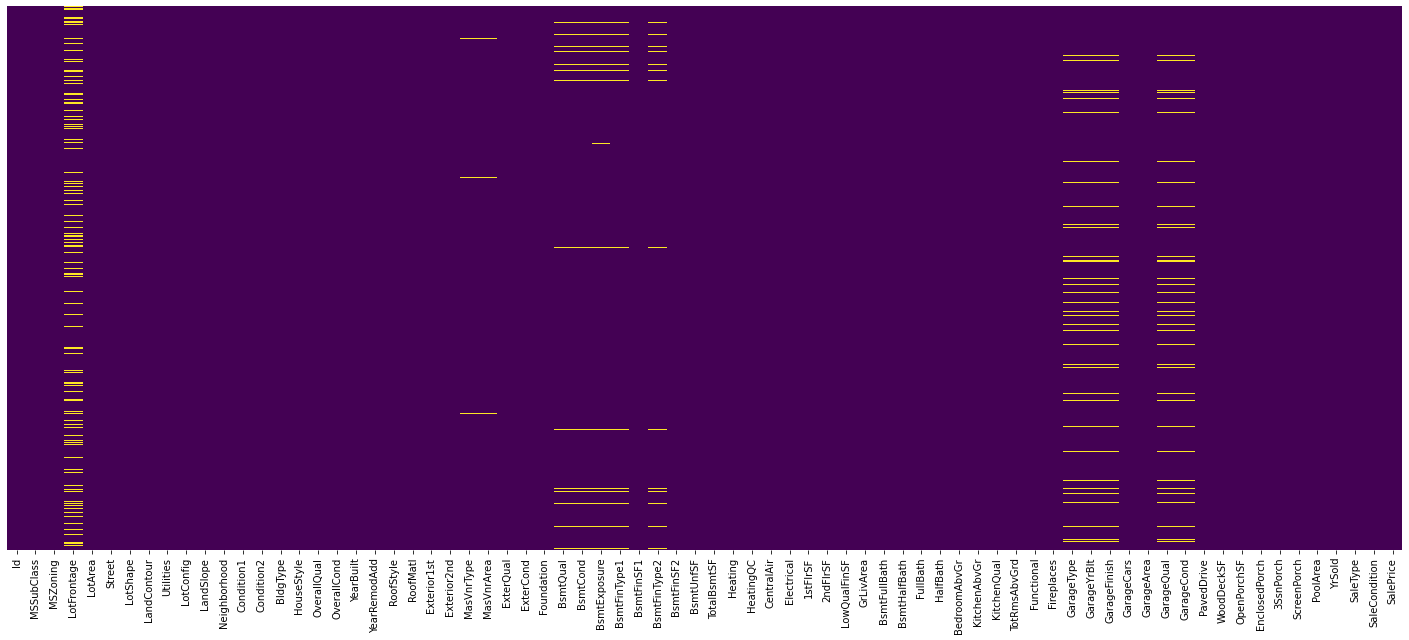

In [12]:
# again observing any null values 
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [13]:
## Fill Missing Values one by one by mean and mode

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])


#df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])


df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

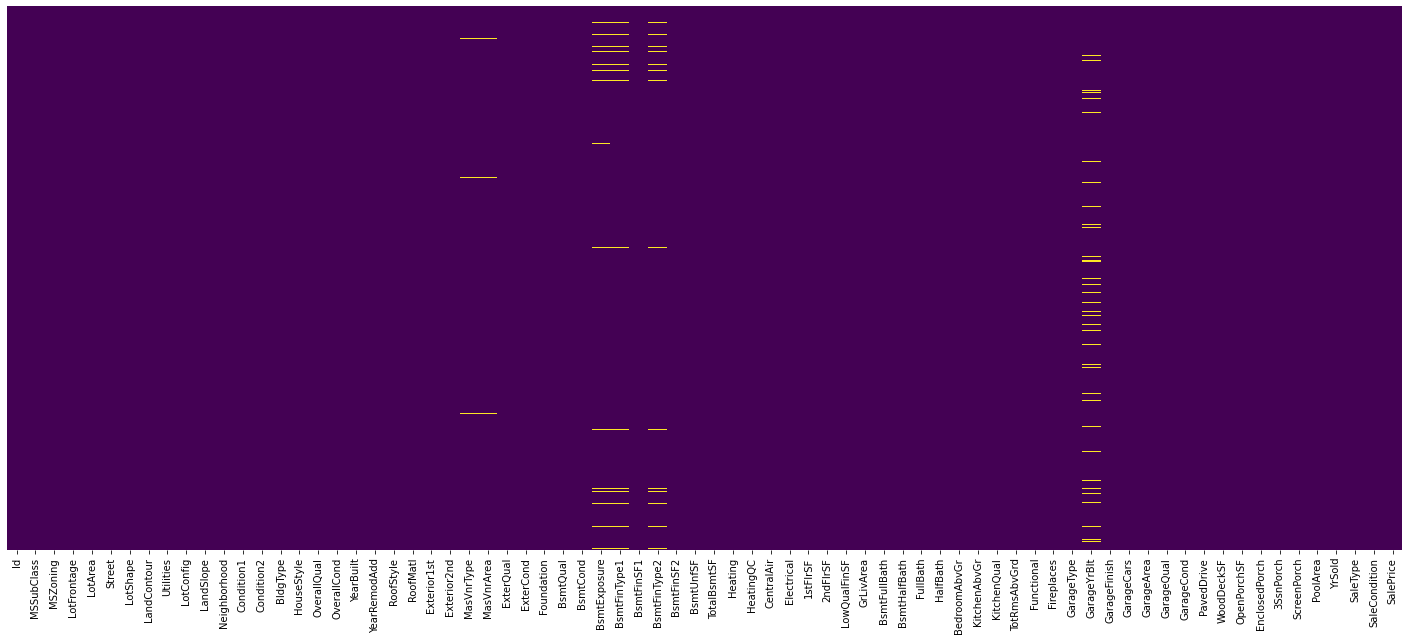

In [14]:
# again observing any null values 
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [15]:

df.shape

(1168, 74)

In [16]:
# filling null values by mode
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

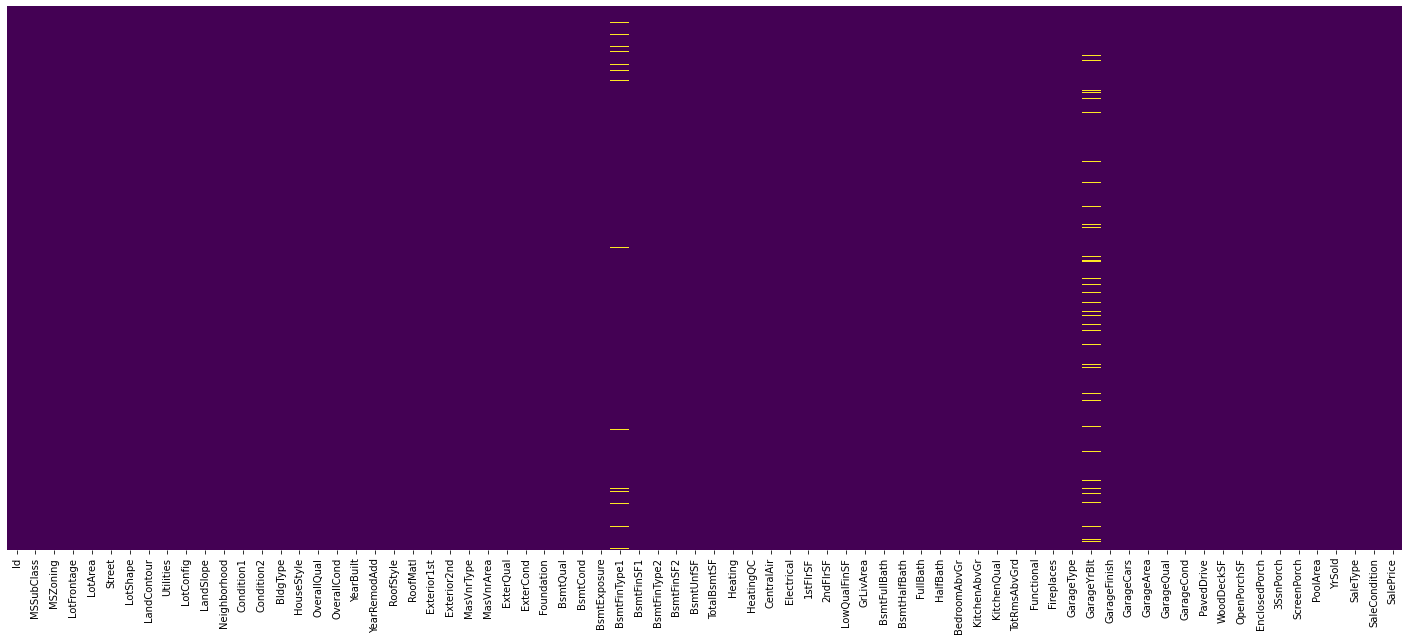

In [17]:
# again observing any null values 
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [18]:
# dropping unwanted columns
df.drop(['Id'],axis=1,inplace=True)

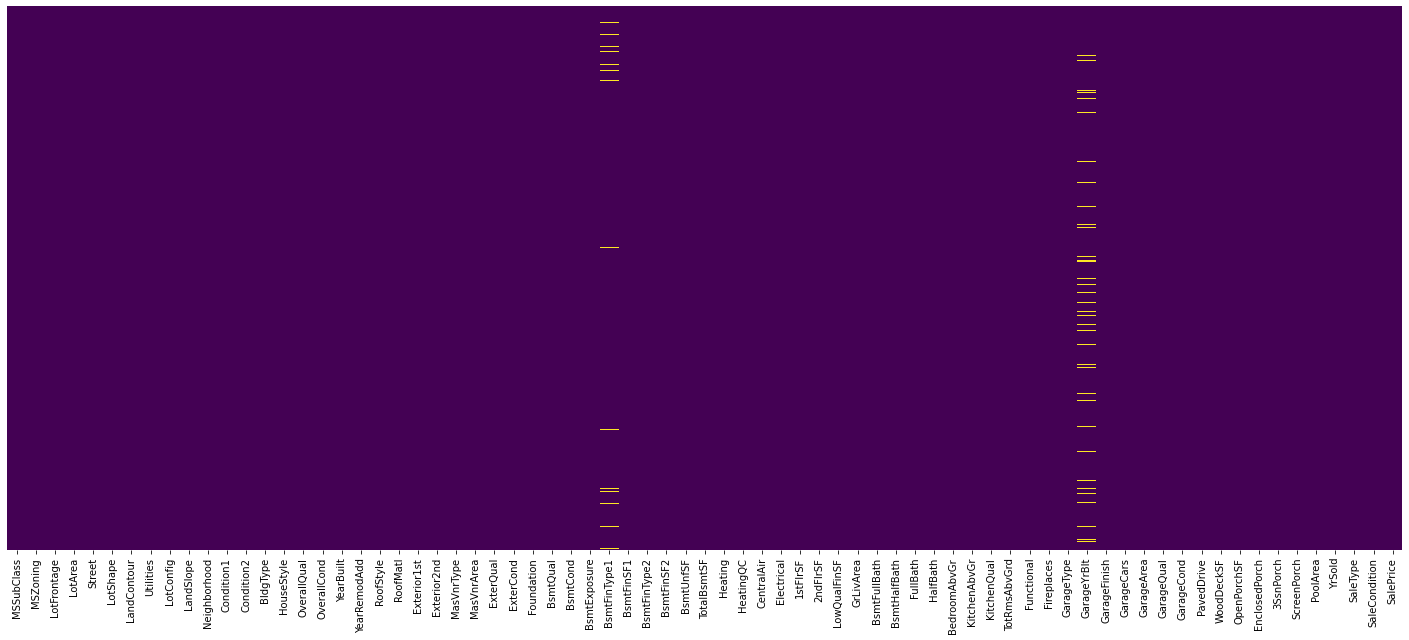

In [19]:
# again observing any null values 
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [20]:
# at last dropping all nulls values 
df.dropna(inplace=True)

In [21]:
# the final shape of the dataset
df.shape

(1080, 73)

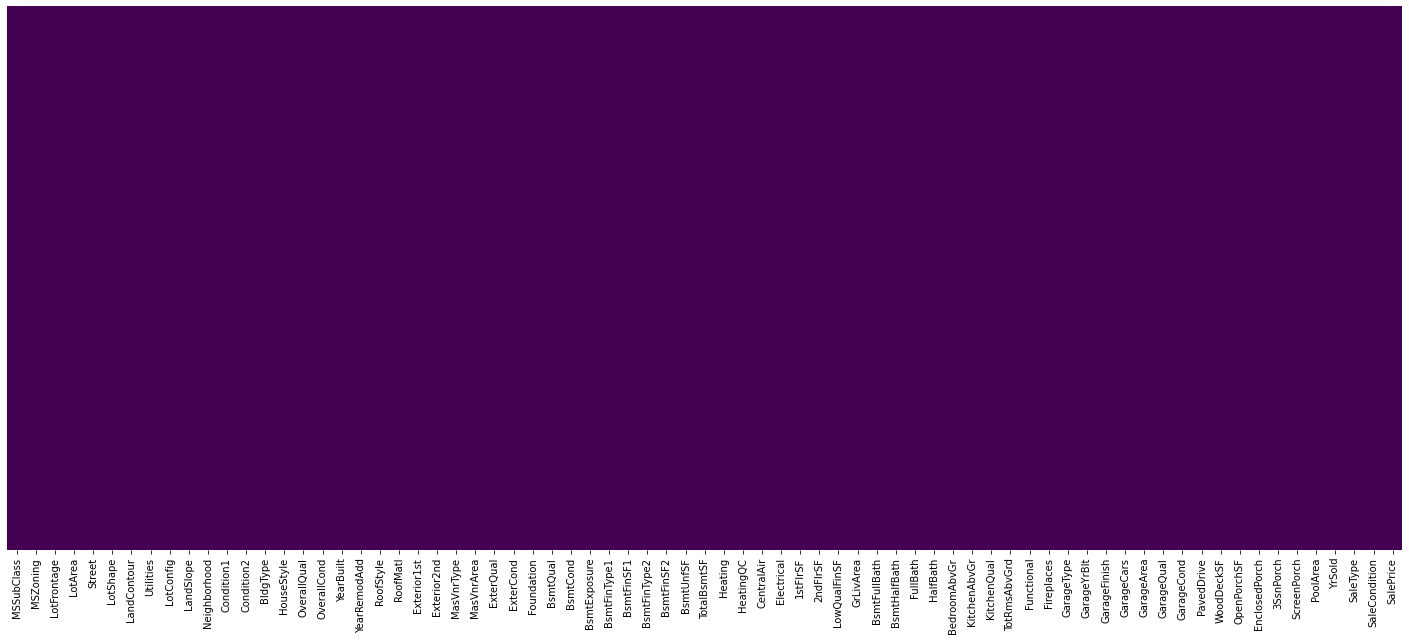

In [22]:
# again observing any null values 
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [24]:
# again observing all datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1167
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1080 non-null   int64  
 1   MSZoning       1080 non-null   object 
 2   LotFrontage    1080 non-null   float64
 3   LotArea        1080 non-null   int64  
 4   Street         1080 non-null   object 
 5   LotShape       1080 non-null   object 
 6   LandContour    1080 non-null   object 
 7   Utilities      1080 non-null   object 
 8   LotConfig      1080 non-null   object 
 9   LandSlope      1080 non-null   object 
 10  Neighborhood   1080 non-null   object 
 11  Condition1     1080 non-null   object 
 12  Condition2     1080 non-null   object 
 13  BldgType       1080 non-null   object 
 14  HouseStyle     1080 non-null   object 
 15  OverallQual    1080 non-null   int64  
 16  OverallCond    1080 non-null   int64  
 17  YearBuilt      1080 non-null   int64  
 18  YearRemo

In [25]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,55.888889,71.662658,10685.312037,6.233333,5.617593,1972.794444,1985.708333,107.965741,465.454630,49.836111,...,1.883333,506.025926,100.656481,47.887037,22.212963,3.769444,16.277778,3.729630,2007.796296,187674.507407
std,40.786938,22.603152,9242.905544,1.331587,1.094711,29.598649,20.438636,186.659006,466.175652,168.953092,...,0.630768,187.114490,128.066825,65.228622,62.750687,29.753351,57.108231,46.680654,1.326701,78574.655649
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7800.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,0.000000,...,1.000000,388.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,135000.000000
50%,50.000000,70.988470,9600.000000,6.000000,5.000000,1975.000000,1995.000000,0.000000,419.000000,0.000000,...,2.000000,485.000000,24.000000,28.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,170000.000000
75%,70.000000,80.000000,11764.750000,7.000000,6.000000,2001.000000,2004.000000,169.000000,735.500000,0.000000,...,2.000000,588.000000,180.000000,72.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,222000.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,2010.000000,755000.000000


## Observations
1] There are 1168 rows and and 81 Columns but after treating nulls values and dropping unwanted columns the dataset now has 1080 rows and 72 columns 

2] there are no duplicates in the dataset 

3] the standrd deviation and max value is high inLotFrontage and LotArea columns 

4] the standrd deviation is very high and crossing mean value in MasVnrArea column and Max value is also too high as compared to 75% quantile

5] the standrd deviation is very high and crossing mean value in BsmtFinSF1 and BsmtFinSF2 column and Max value is also too high as compared to 75% quantile

6] The GarageArea column look fine to me.

7] the standrd deviation is very high and crossing mean value in WoodDeckSF, OpenPorchSF column and Max value is also too high as compared to 75% quantile 

8] I observe some problem in EnclosedPorch and ScreenPorch columns as all the quantile has zero value but max is too high.

9] the standrd deviation and max value is high SalePrice as it is our target varaible.

## Handling all categorical columns

In [50]:
cateforical_fetures = [feature for feature in df.columns if df[feature].dtypes=='O']
print(len(cateforical_fetures))
print(cateforical_fetures)

38
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


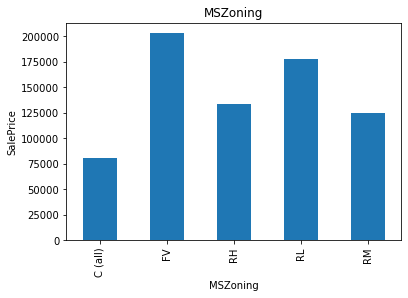

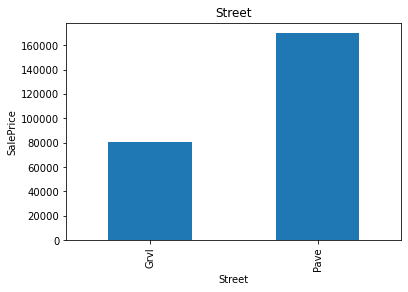

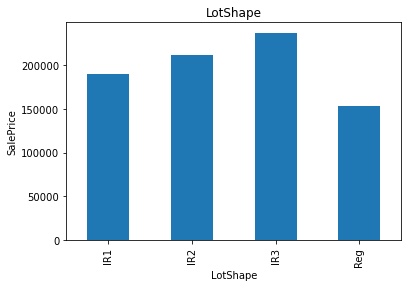

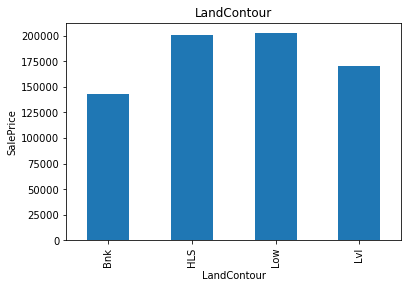

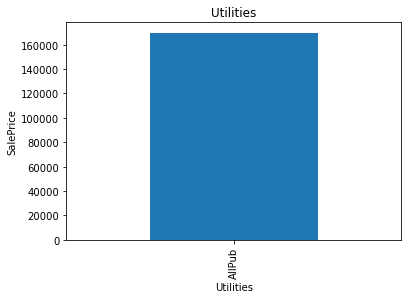

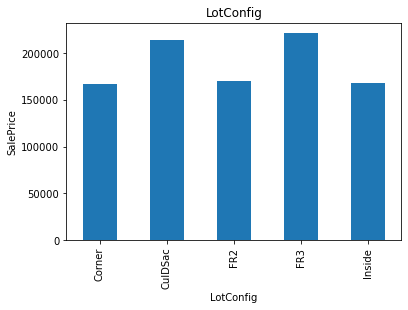

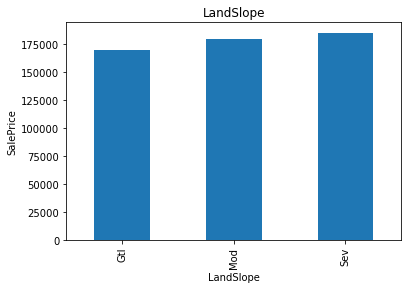

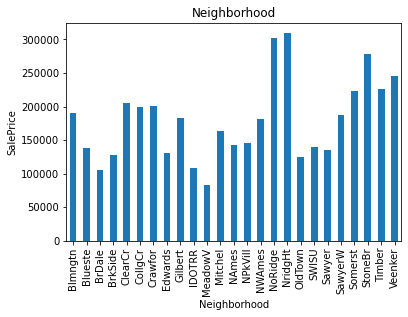

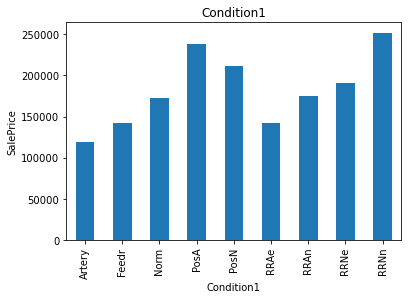

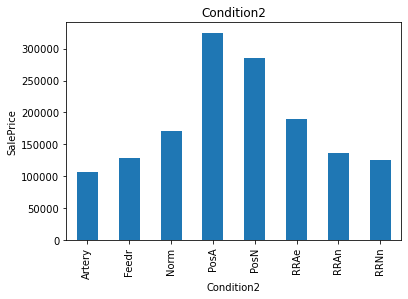

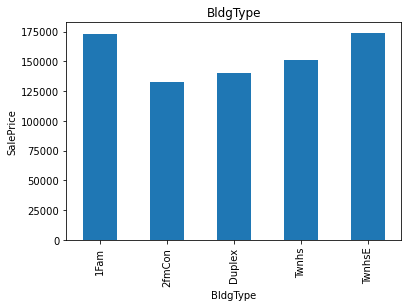

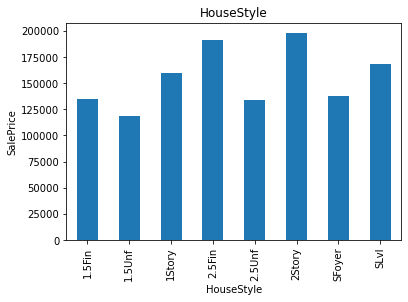

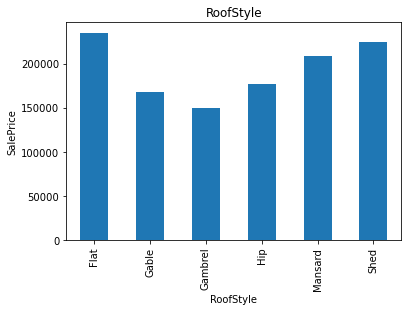

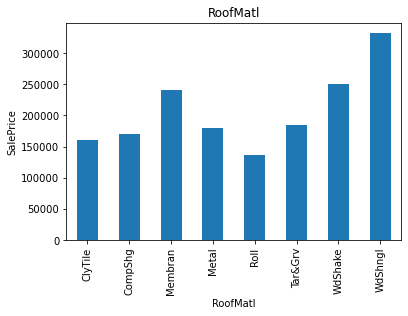

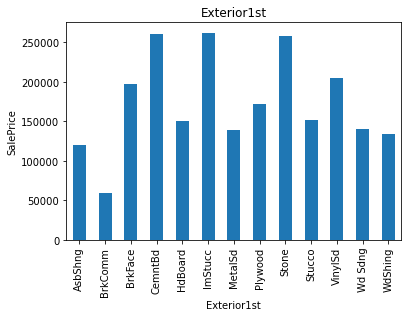

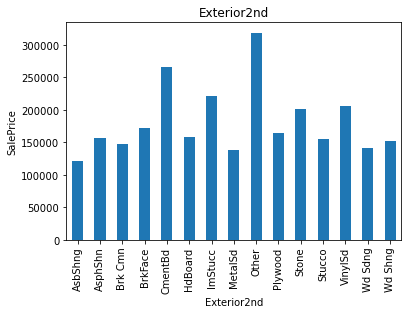

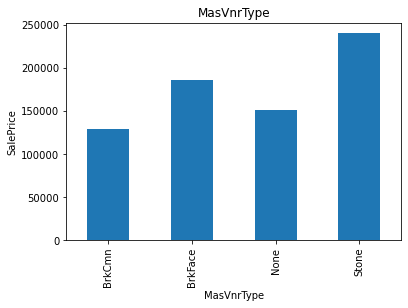

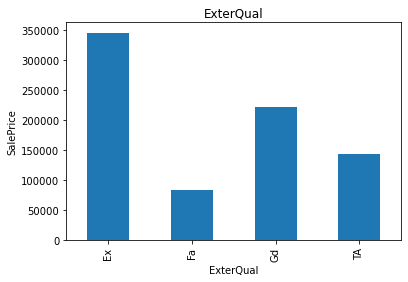

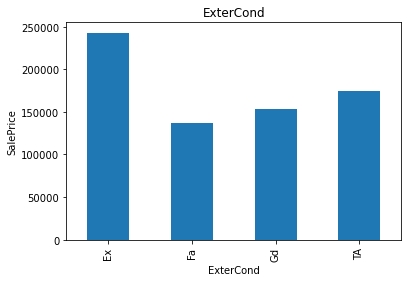

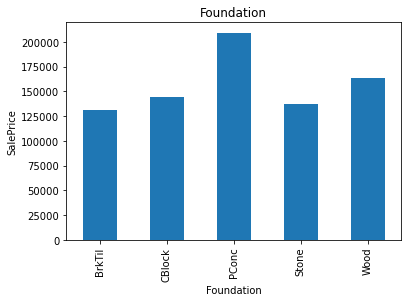

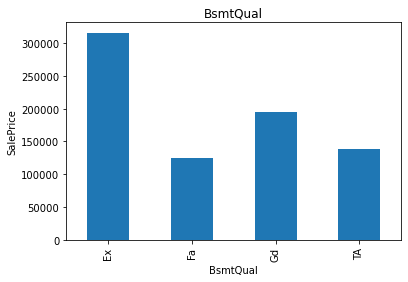

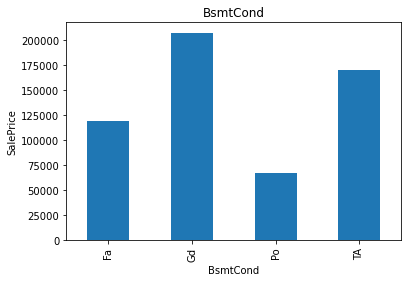

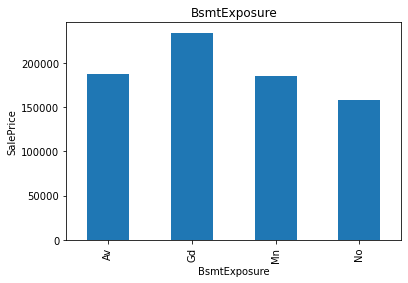

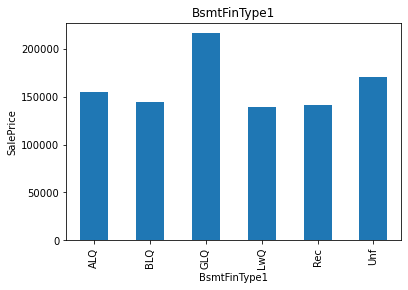

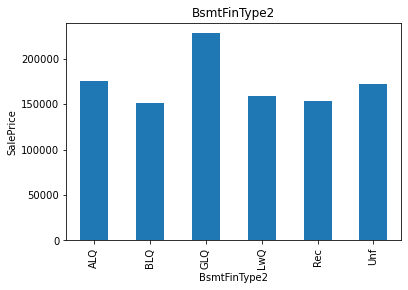

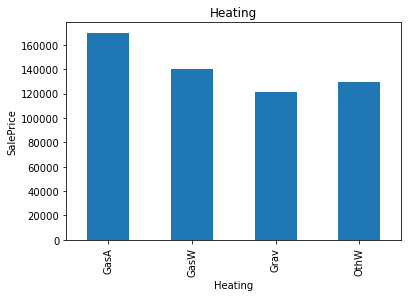

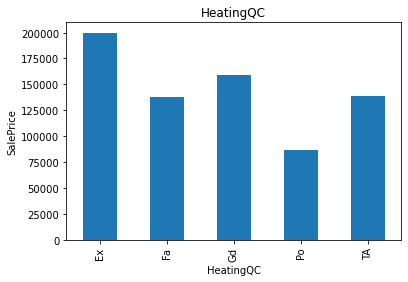

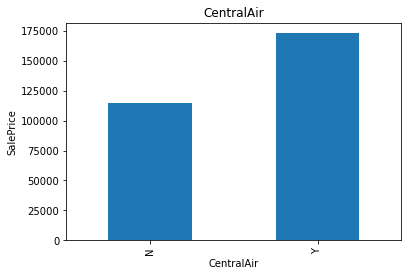

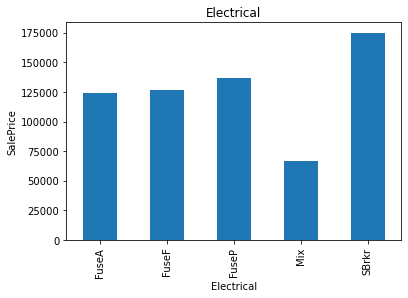

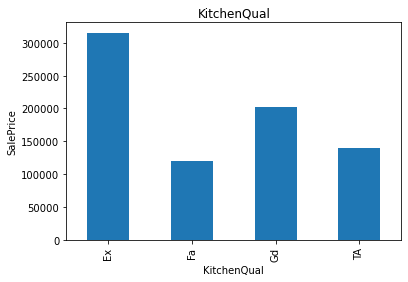

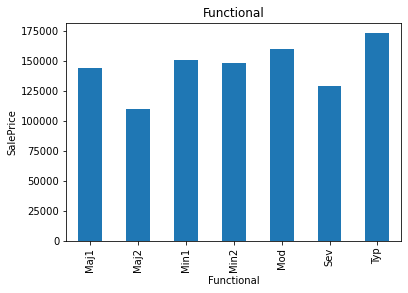

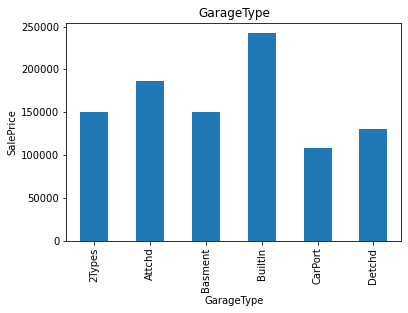

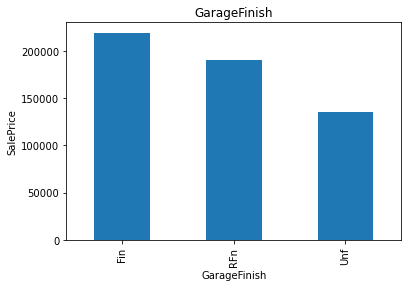

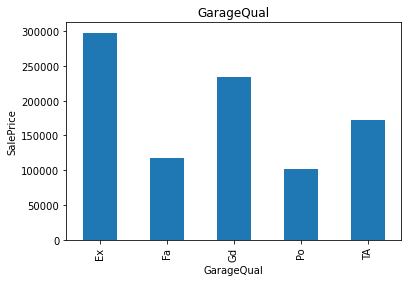

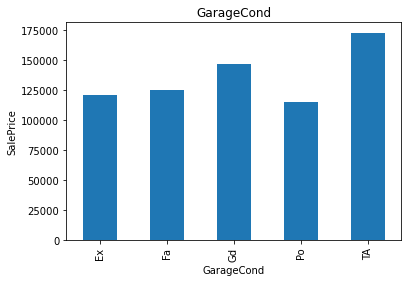

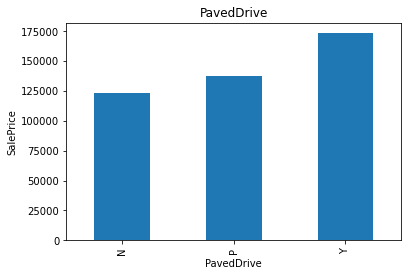

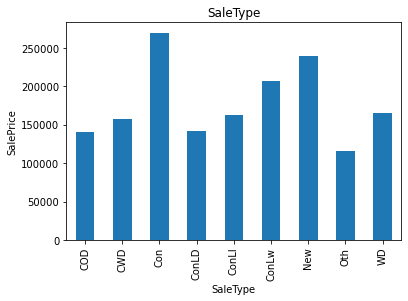

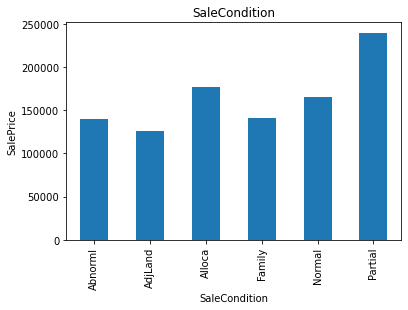

In [51]:
# comparing all categorical columns with our target variable
for feature in cateforical_fetures:
    df1 = df.copy()
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Observations from above Graphs

1] So according to the MSZoning FV (Floating Village Residential) has the highest selling price followed by RL (Residential Low Density) and C (Commercial) has a low selling price 

2] So According to the street graph, we have two types of roads Gravel and Paved so the road type pave has a high sale price as compared to gravel road type 

3] So According to the Lotshape, The IR3 (Irregular) type has a high sale price followed by IR2(Moderately Irregular) and IR1 (Slightly irregular) and the least sale price is for REG (Regular) shape lot shape

4] So According to the LandCountour HLS(Hillside - Significant slope from side to side) and LOW (Depression) have equal and higher sale prices as compared to other Landcontour followed by LVL (Near Flat/Level) types of the LandContour

5] So According to the data, we have 4 types of utilities that are ALLPUB (All public Utilities (E, G, W,& S)), Nosewr (Electricity, Gas, and Water (Septic Tank)), Nosewa (Electricity and Gas Only), ELO (Electricity only) but according to our Graph we observe all the utilities in the dataset is only using 1 type of utilities that is AllPub (All public Utilities (E, G, W,& S))

6] So According to the lot configuration, we have 5 types of lot configuration that is Inside (Inside lot), Corner (Corner lot), CulDSac (Cul-de-sac), FR2 (Frontage on 2 sides of the property), FR3 (Frontage on 3 sides of property) and when we compare to the sale price we observe FR3 and CulDSac has Highest Selling price.

7] So according to the Landslope we have 3 types of landscape that is Gtl (Gentle slope), Mod (Moderate Slope), and Sev (Severe Slope), and when we compare to the sale price we observe Landslope which has the highest salingprice is Sev followed by Mod and Gtl

8] So according to the Neighbourhood, there are 25 unique types in the neighborhood and we observe NridgHt (Northridge Heights), and NWAmes (Northwest Ames) these 2 neighborhood has the highest selling price, and MeadowV (Meadow Village) has a low selling price

9] So according to the house style, we have 8 different house styles and in that 2Story and 2.5Fin (Two and one-half story: 2nd level finished) has the highest-selling Price as compared to other House styles

10] So according to the Roofstyle, we have 6 different roof style and we observe Flat and Shed has the highest selling price as compared to the other roof style 

11] So according to the Exterior covering of the house, we have 17 different types of Exterior covering house but the most popular and highest selling are CemntBd (Cement Board), ImStucc (Imitation Stucco), and Stone (Stone)

12] So according to the type of Foundation use we have 5 different types of foundation and the highest selling is the PConc (Poured Concrete) type of foundation

13] So According to the Heating, we have 5 different types of heating but the most selling type of heating is GasA (Gas forced warm air furnace)

14] So According to the CentrailAir which house that has Central is the highest selling as compared to the house which does not have central air

15] So according to the Electrical System installed in every property the electrical system with SBrkr (Standard Circuit Breakers & Romex) has the highest selling price

16] So according to the GarageType, we have 6 different types of the garage but BuiltIn Built-In (The garage part of the house - typically has room above the garage) has the highest selling price

## Handling all numercial columns

In [52]:
numercial_features=[feature for feature in df.columns if df[feature].dtypes!='O']

print('Number of numerical features: ', len(numercial_features))

df[numercial_features].head()

Number of numerical features:  35


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice
0,120,70.98847,4928,6,5,1976,1976,0.0,120,0,...,2,440,0,205,0,0,0,0,2007,128000
1,20,95.00000,15865,8,6,1970,1970,0.0,351,823,...,2,621,81,207,0,0,224,0,2007,268000
2,60,92.00000,9920,7,5,1996,1997,0.0,862,0,...,2,455,180,130,0,0,0,0,2007,269790
3,20,105.00000,11751,6,6,1977,1977,480.0,705,0,...,2,546,0,122,0,0,0,0,2010,190000
4,20,70.98847,16635,6,7,1977,2000,126.0,1246,0,...,2,529,240,0,0,0,0,0,2009,215000


In [53]:
year_feature = [feature for feature in numercial_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

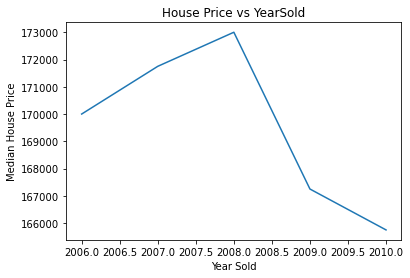

In [54]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs YearSold')

## From the above line plot, we observe house prices were increasing from the year 2006 to 2008 but after that, there is a sudden drop in the price of the house, and it continued till 2010 year.

In [55]:
discrete_feature = [feature for feature in numercial_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]

print('Discrete variables count : {}'.format(len(discrete_feature)))

Discrete variables count : 15


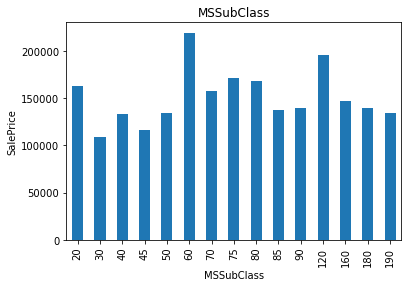

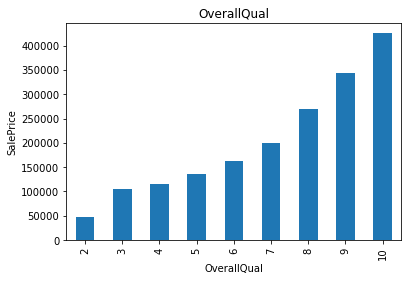

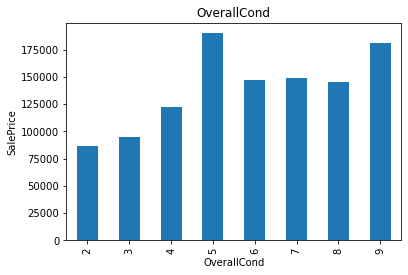

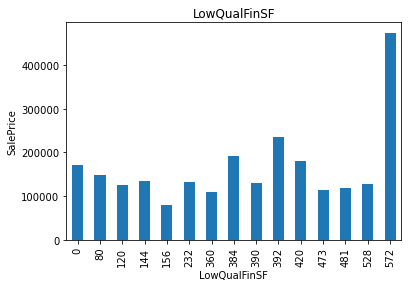

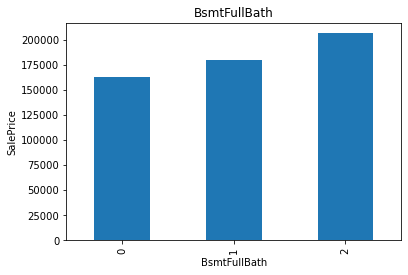

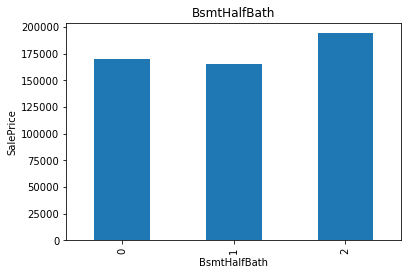

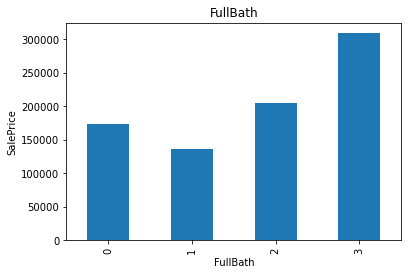

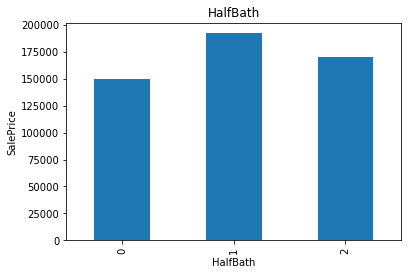

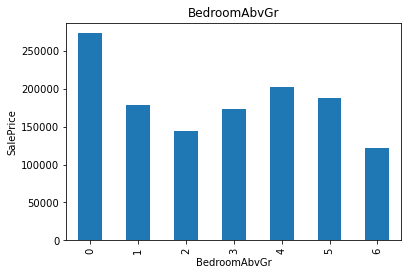

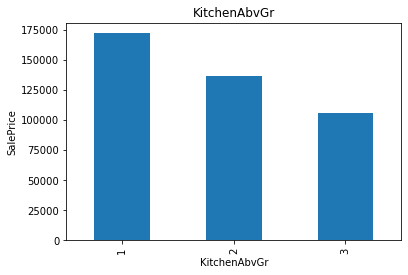

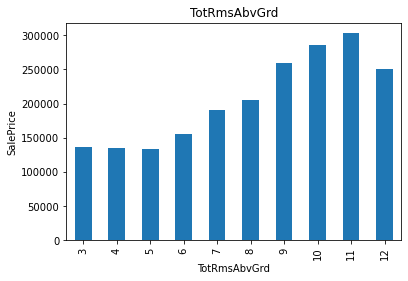

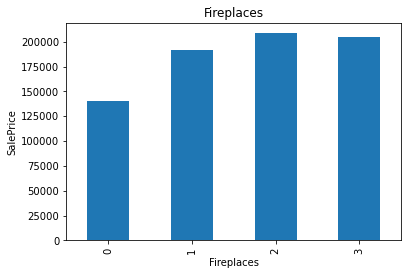

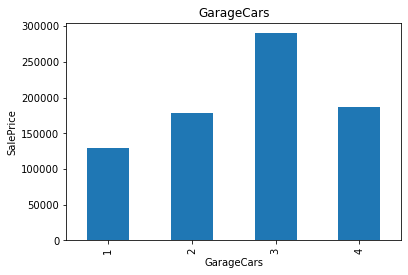

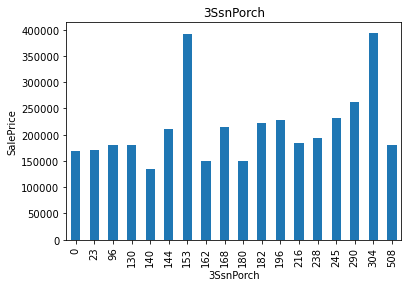

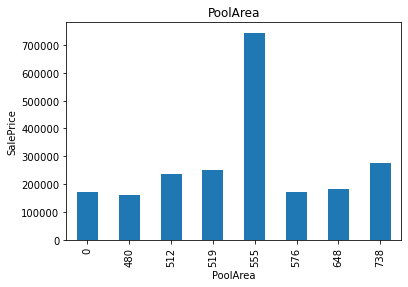

In [56]:
for feature in discrete_feature:
    df1 = df.copy()
    df1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Handling all continuous columns

In [57]:
continuous_feature = [feature for feature in numercial_features if feature not in discrete_feature+year_feature+['Id']]

print('Continuous feature count {}'.format(len(continuous_feature)))

Continuous feature count 16


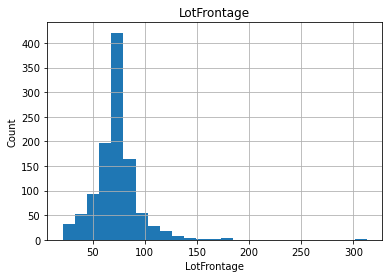

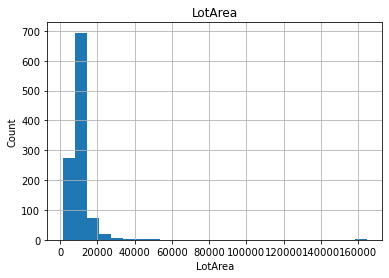

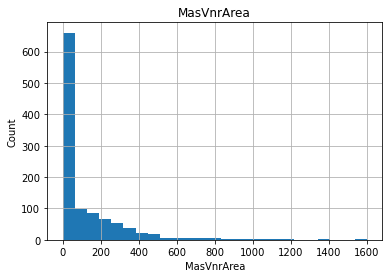

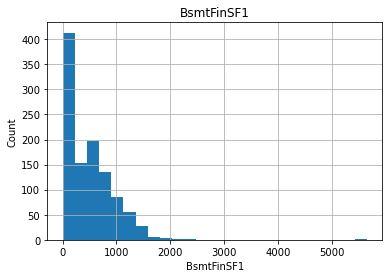

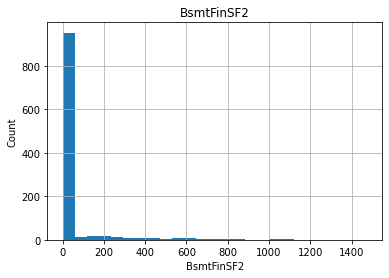

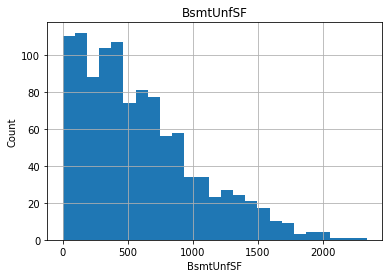

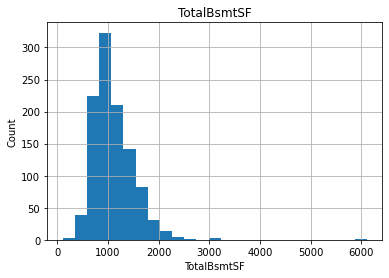

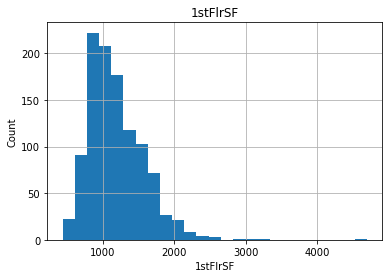

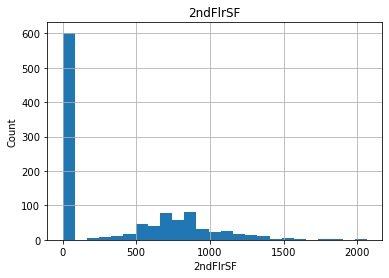

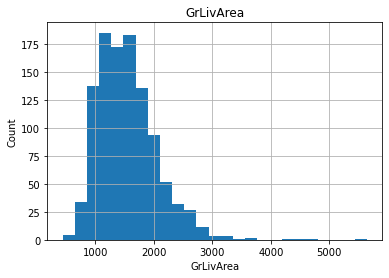

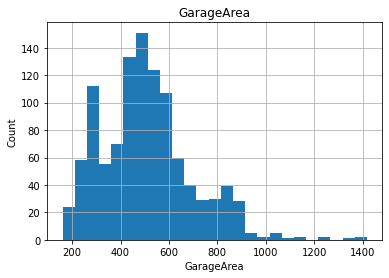

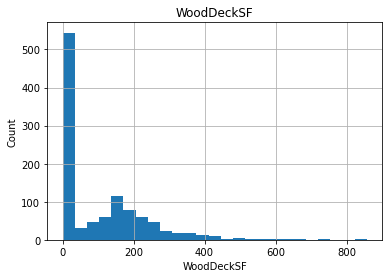

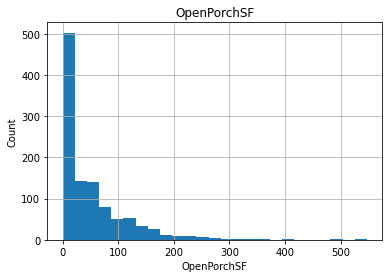

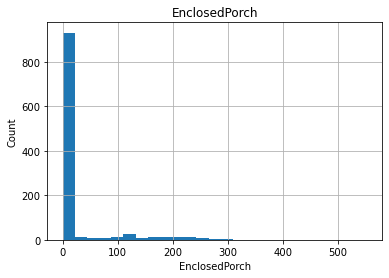

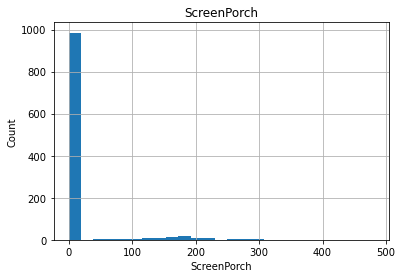

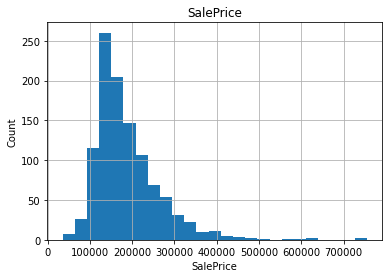

In [58]:
for feature in continuous_feature:
    df1 = df.copy()
    df1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

## From the Above graph, we observe all the continuous data is right skewed and has a large number of outliers.

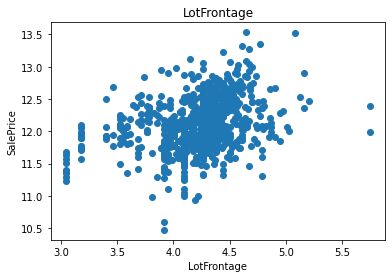

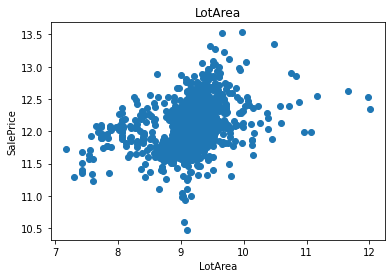

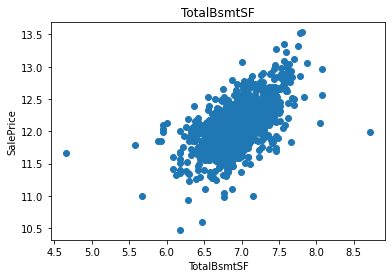

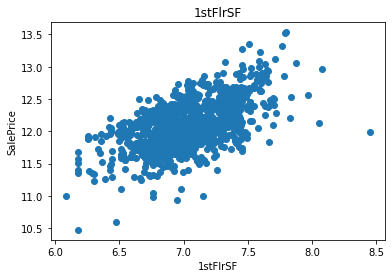

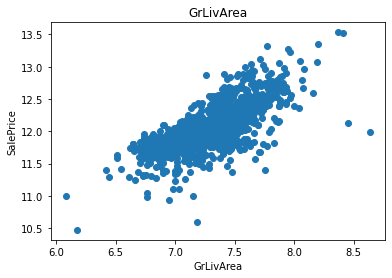

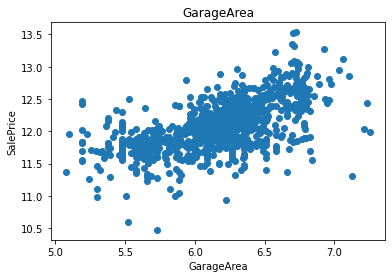

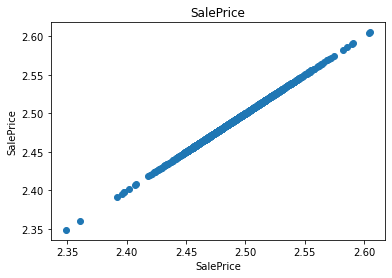

In [59]:
for feature in continuous_feature:
    df1 = df.copy(deep=True)
    if 0 in df1[feature].unique():
        pass
    else:
        df1[feature]=np.log(df1[feature])
        df1['SalePrice']=np.log(df1['SalePrice'])
        plt.scatter(df1[feature], df1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

## From the above Scatter plot, we observe there is a trend (co-relation) between garage area vs Saleprice, GrlivArea vs Saleprice, and 1stFlrSF vs Saleprice.

## Handling all continuous columns to see outliers

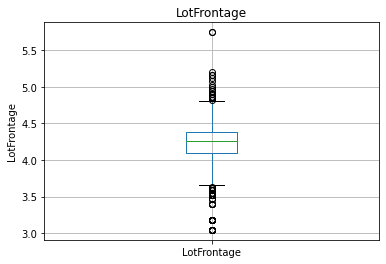

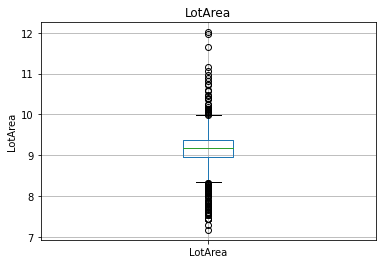

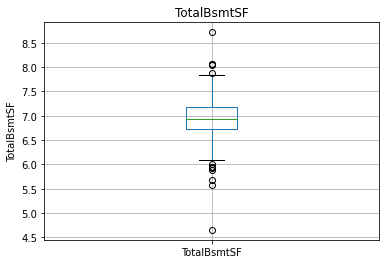

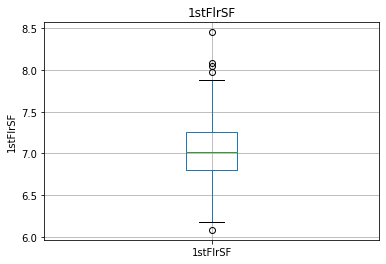

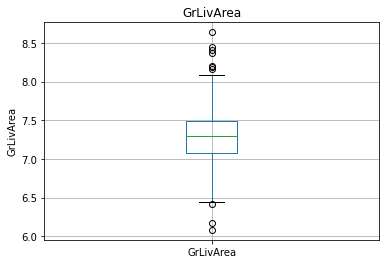

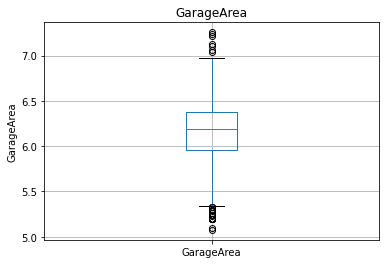

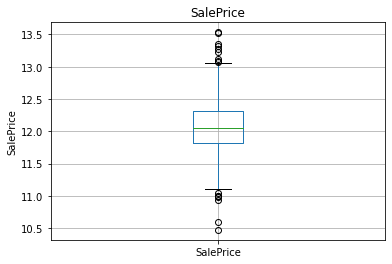

In [60]:
for feature in continuous_feature:
    df1 = df.copy(deep=True)
    if 0 in df1[feature].unique():
        pass
    else:
        df1[feature]=np.log(df1[feature])
        df1.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Checking for duplicates

In [61]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition,SalePrice


In [62]:
categorical_features  = [feature for feature in df.columns if df[feature].dtypes=="O"]
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

## Appling Label Encoder to categorical_features

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [64]:
df2=le.fit_transform(df['MSZoning'])
pd.Series(df2)
df['MSZoning']=df2

In [65]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,205,0,0,0,0,2007,WD,Normal,128000
1,20,3,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,...,81,207,0,0,224,0,2007,WD,Normal,268000
2,60,3,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,180,130,0,0,0,0,2007,WD,Normal,269790
3,20,3,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,122,0,0,0,0,2010,COD,Normal,190000
4,20,3,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,240,0,0,0,0,0,2009,WD,Normal,215000


In [66]:
df2=le.fit_transform(df['Street'])
pd.Series(df2)
df['Street']=df2

In [67]:
df2=le.fit_transform(df['LotShape'])
pd.Series(df2)
df['LotShape']=df2


In [68]:
df2=le.fit_transform(df['LandContour'])
pd.Series(df2)
df['LandContour']=df2


In [69]:
df2=le.fit_transform(df['Utilities'])
pd.Series(df2)
df['Utilities']=df2

In [70]:
df2=le.fit_transform(df['LotConfig'])
pd.Series(df2)
df['LotConfig']=df2


In [71]:
df2=le.fit_transform(df['LandSlope'])
pd.Series(df2)
df['LandSlope']=df2


In [72]:
df2=le.fit_transform(df['Neighborhood'])
pd.Series(df2)
df['Neighborhood']=df2


In [73]:
df2=le.fit_transform(df['Condition1'])
pd.Series(df2)
df['Condition1']=df2


In [74]:
df2=le.fit_transform(df['Condition2'])
pd.Series(df2)
df['Condition2']=df2



In [75]:
df2=le.fit_transform(df['BldgType'])
pd.Series(df2)
df['BldgType']=df2

In [76]:
df2=le.fit_transform(df['HouseStyle'])
pd.Series(df2)
df['HouseStyle']=df2



In [77]:
df2=le.fit_transform(df['RoofStyle'])
pd.Series(df2)
df['RoofStyle']=df2


In [78]:
df2=le.fit_transform(df['RoofMatl'])
pd.Series(df2)
df['RoofMatl']=df2


In [79]:
df2=le.fit_transform(df['Exterior1st'])
pd.Series(df2)
df['Exterior1st']=df2


In [80]:
df2=le.fit_transform(df['Exterior2nd'])
pd.Series(df2)
df['Exterior2nd']=df2


In [81]:
df2=le.fit_transform(df['MasVnrType'])
pd.Series(df2)
df['MasVnrType']=df2


In [82]:
df2=le.fit_transform(df['ExterQual'])
pd.Series(df2)
df['ExterQual']=df2

In [83]:
df2=le.fit_transform(df['ExterCond'])
pd.Series(df2)
df['ExterCond']=df2


In [84]:
df2=le.fit_transform(df['Foundation'])
pd.Series(df2)
df['Foundation']=df2


In [85]:
df2=le.fit_transform(df['BsmtQual'])
pd.Series(df2)
df['BsmtQual']=df2


In [86]:
df2=le.fit_transform(df['BsmtCond'])
pd.Series(df2)
df['BsmtCond']=df2


In [87]:
df2=le.fit_transform(df['BsmtExposure'])
pd.Series(df2)
df['BsmtExposure']=df2


In [88]:
df2=le.fit_transform(df['BsmtFinType1'])
pd.Series(df2)
df['BsmtFinType1']=df2


In [89]:
df2=le.fit_transform(df['BsmtFinType2'])
pd.Series(df2)
df['BsmtFinType2']=df2


In [90]:
df2=le.fit_transform(df['Heating'])
pd.Series(df2)
df['Heating']=df2

In [91]:
df2=le.fit_transform(df['HeatingQC'])
pd.Series(df2)
df['HeatingQC']=df2


In [92]:
df2=le.fit_transform(df['CentralAir'])
pd.Series(df2)
df['CentralAir']=df2


In [93]:
df2=le.fit_transform(df['Electrical'])
pd.Series(df2)
df['Electrical']=df2


In [94]:
df2=le.fit_transform(df['KitchenQual'])
pd.Series(df2)
df['KitchenQual']=df2


In [95]:
df2=le.fit_transform(df['Functional'])
pd.Series(df2)
df['Functional']=df2


In [96]:
df2=le.fit_transform(df['GarageType'])
pd.Series(df2)
df['GarageType']=df2


In [97]:
df2=le.fit_transform(df['GarageFinish'])
pd.Series(df2)
df['GarageFinish']=df2

In [98]:
df2=le.fit_transform(df['GarageQual'])
pd.Series(df2)
df['GarageQual']=df2


In [99]:
df2=le.fit_transform(df['GarageCond'])
pd.Series(df2)
df['GarageCond']=df2



In [100]:
df2=le.fit_transform(df['PavedDrive'])
pd.Series(df2)
df['PavedDrive']=df2



In [101]:
df2=le.fit_transform(df['SaleType'])
pd.Series(df2)
df['SaleType']=df2


In [102]:
df2=le.fit_transform(df['SaleCondition'])
pd.Series(df2)
df['SaleCondition']=df2


In [103]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.98847,4928,1,0,3,0,4,0,...,0,205,0,0,0,0,2007,8,4,128000
1,20,3,95.00000,15865,1,0,3,0,4,1,...,81,207,0,0,224,0,2007,8,4,268000
2,60,3,92.00000,9920,1,0,3,0,1,0,...,180,130,0,0,0,0,2007,8,4,269790
3,20,3,105.00000,11751,1,0,3,0,4,0,...,0,122,0,0,0,0,2010,0,4,190000
4,20,3,70.98847,16635,1,0,3,0,2,0,...,240,0,0,0,0,0,2009,8,4,215000


In [104]:
# checking datatypes after applying Label Encoder
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1167
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1080 non-null   int64  
 1   MSZoning       1080 non-null   int32  
 2   LotFrontage    1080 non-null   float64
 3   LotArea        1080 non-null   int64  
 4   Street         1080 non-null   int32  
 5   LotShape       1080 non-null   int32  
 6   LandContour    1080 non-null   int32  
 7   Utilities      1080 non-null   int32  
 8   LotConfig      1080 non-null   int32  
 9   LandSlope      1080 non-null   int32  
 10  Neighborhood   1080 non-null   int32  
 11  Condition1     1080 non-null   int32  
 12  Condition2     1080 non-null   int32  
 13  BldgType       1080 non-null   int32  
 14  HouseStyle     1080 non-null   int32  
 15  OverallQual    1080 non-null   int64  
 16  OverallCond    1080 non-null   int64  
 17  YearBuilt      1080 non-null   int64  
 18  YearRemo

## Plotting Disrtibution plot to see how data is distributed but we will observe for continuous data

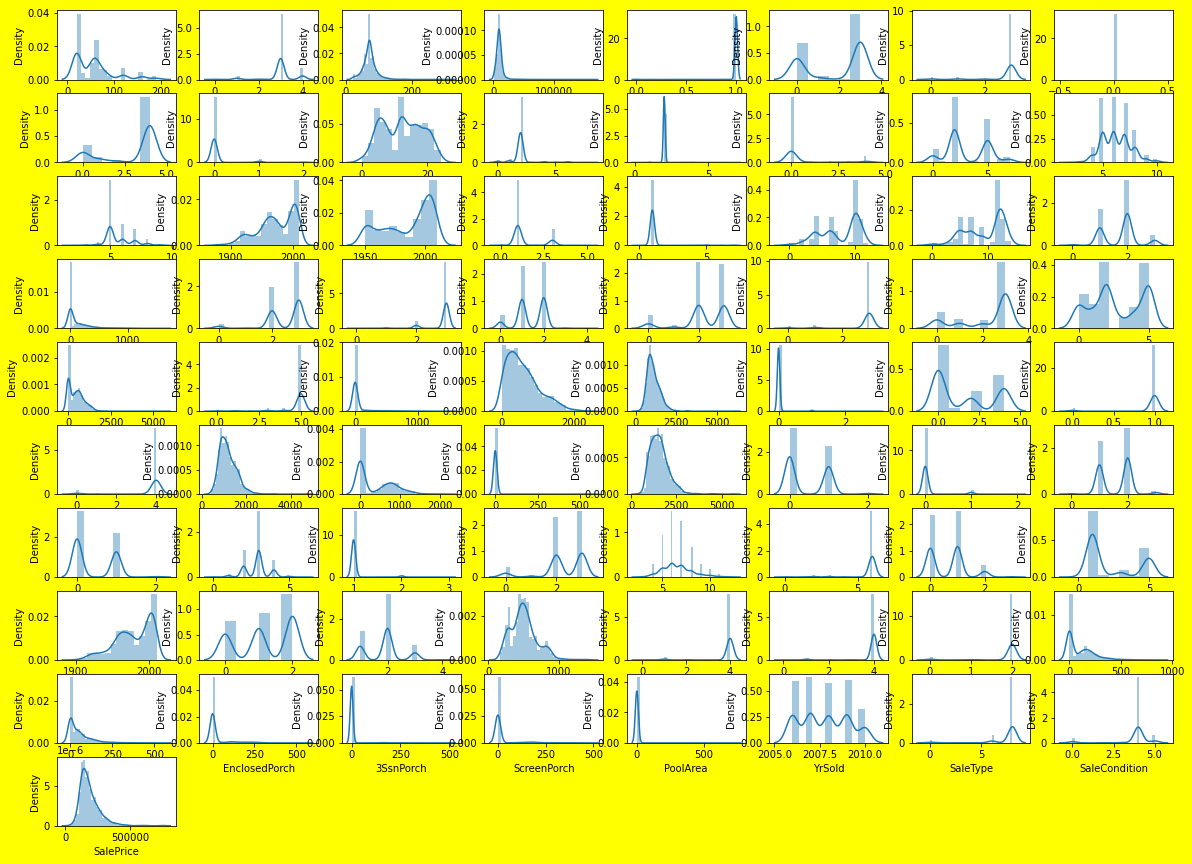

In [105]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 80:
        ax = plt.subplot(10,8,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

### And from above distribution plot we observe that the continuous data is right skewed 

## Splitting the dataset

In [106]:
# seperate label n feature
X=df.drop(['SalePrice'], axis=1)
y=df.SalePrice

## Plotting Scatter plot to see realtion between feature and label

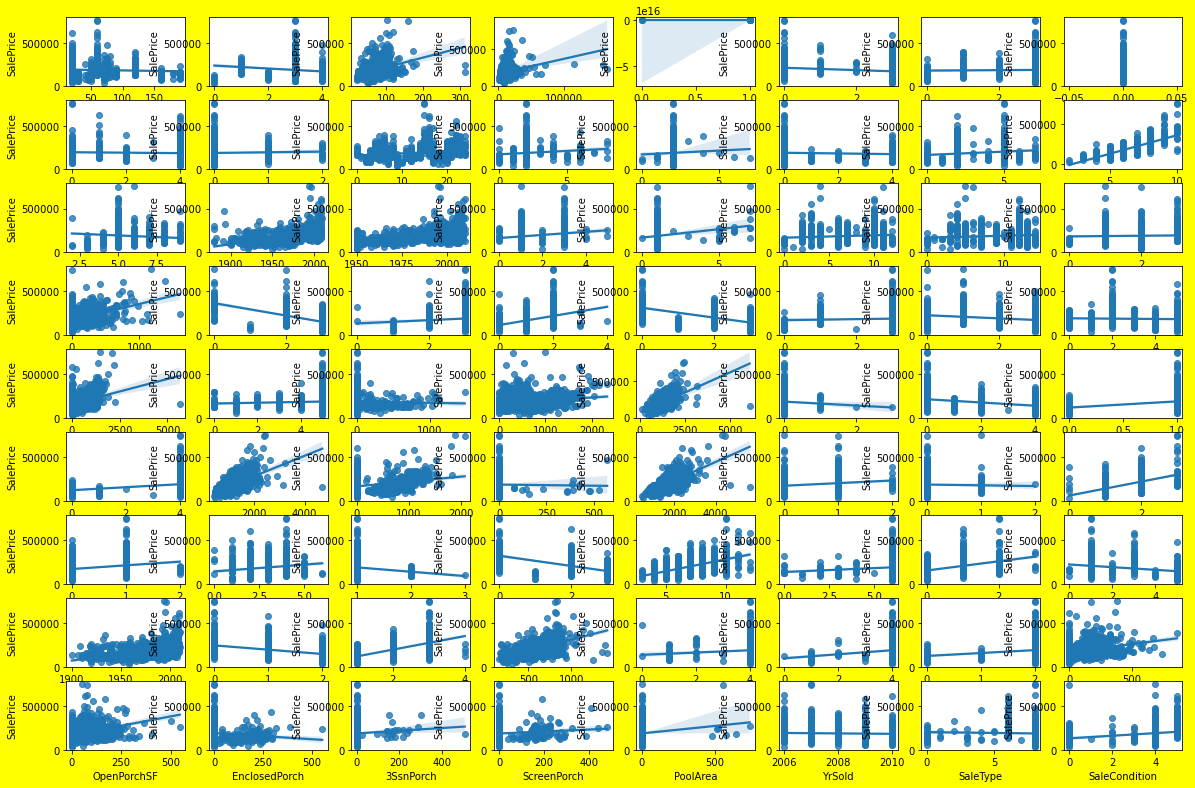

In [107]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 80:
        ax = plt.subplot(10,8,plotnumber)
        sns.regplot (X[column],y)
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## Plotting Box plot to see outliers are present are not

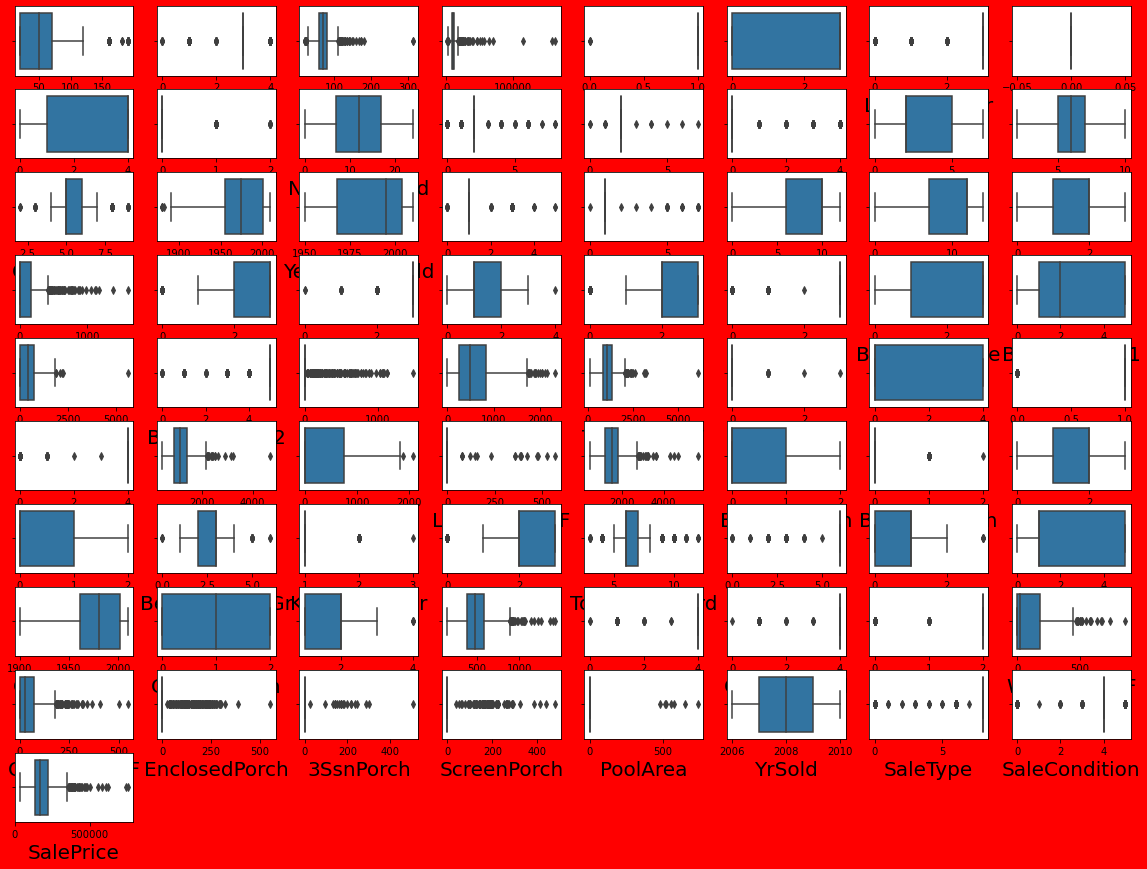

In [108]:
plt.figure(figsize=(20,15) , facecolor = 'red')
graph = 1

for column in df:
    
    if graph <= 80:
        plt.subplot (10,8,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

### We observe large amount of outliers and we have to treat it 

### Treating outliers with Z-score method

In [109]:
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore

In [110]:
# new code for deleting outlier here we take std = 3
z_score = zscore(X)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.8 ).all(axis=1)



## # finding correlation between feature n lable using CORR method

<AxesSubplot:title={'center':'Correlation with target'}>

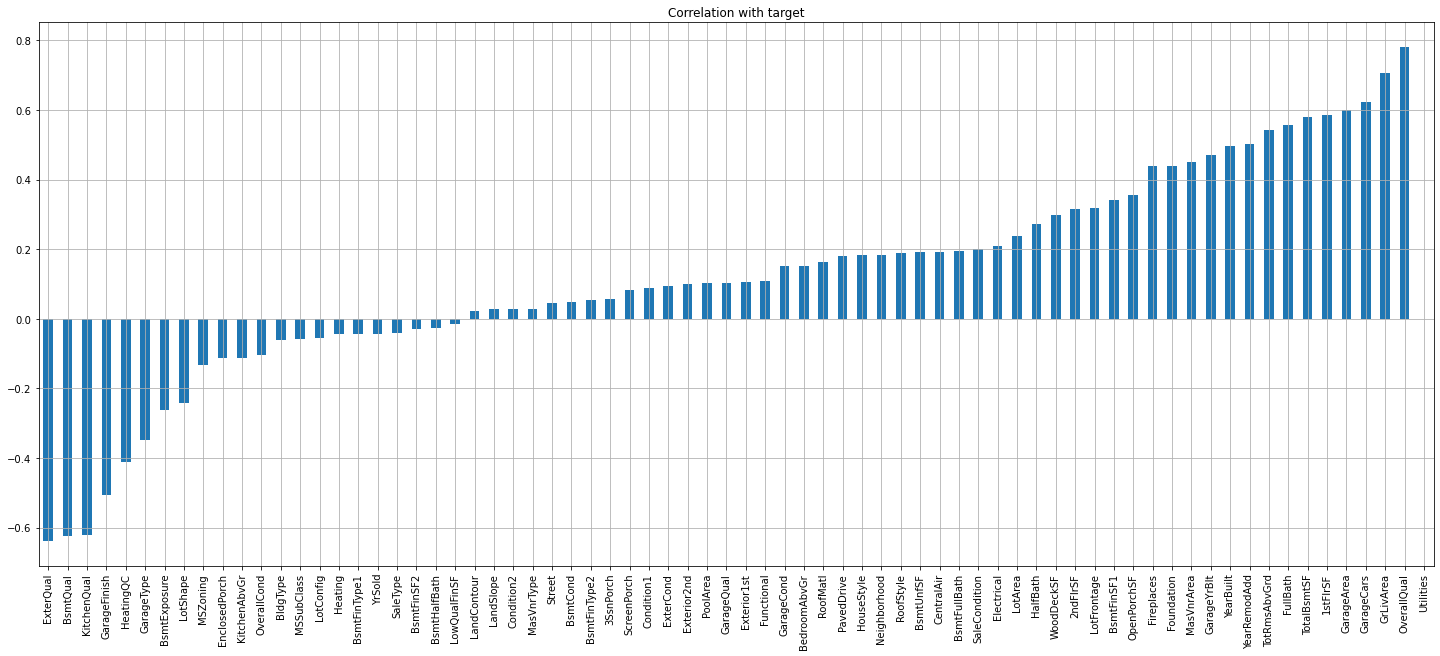

In [111]:
#  (code type      --   feature corrwith label)

df.drop('SalePrice' , axis =1 ).corrwith (df.SalePrice).sort_values().plot(kind='bar',grid=True,figsize=(25,10),title='Correlation with target')

## Scaling the data

In [112]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

## check for multicolinearity using VIF (For this problem we consider Maximum VIF = 10)

In [114]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif.head(15)

,vif,features
0,5.205451,MSSubClass
1,1.407634,MSZoning
2,1.772972,LotFrontage
3,1.811188,LotArea
4,1.298476,Street
5,1.257049,LotShape
6,1.345001,LandContour
7,NaN,Utilities
8,1.164497,LotConfig
9,1.632617,LandSlope


### so we observe all the values are inside 10 so selecting all the features.

In [90]:
df['Street'].value_counts()

1    1077
0       3
Name: Street, dtype: int64

In [91]:
df['SalePrice'].nunique()

545

## Using Feature Selection Technique SelectKBest

In [115]:
# selecting 12 best feature 
from sklearn.feature_selection import SelectKBest , f_classif

In [116]:
#select best feature
# selecting 20 best feature 
from sklearn.feature_selection import SelectKBest , f_classif

best_feature = SelectKBest(score_func=f_classif , k=20)

fit = best_feature.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)

df_column = pd.DataFrame(X.columns)

feature_scores = pd.concat ([df_column , df_scores ] , axis =1)

feature_scores.columns=['Feature_Name' , 'Scores']

print (feature_scores.nlargest (20, 'Scores'))

    Feature_Name    Scores
4         Street       inf
15   OverallQual  4.771044
25     ExterQual  3.733483
44     GrLivArea  2.949725
28      BsmtQual  2.817965
58    GarageCars  2.639941
51   KitchenQual  2.570172
59    GarageArea  2.429669
47      FullBath  2.379564
17     YearBuilt  2.061241
41      1stFlrSF  2.058185
57  GarageFinish  2.040479
1       MSZoning  1.918441
24    MasVnrArea  1.810083
3        LotArea  1.800817
56   GarageYrBlt  1.786083
18  YearRemodAdd  1.754183
52  TotRmsAbvGrd  1.738570
36   TotalBsmtSF  1.619028
27    Foundation  1.593072


###  with using SelectKBest feature selection technique we select top 20 features.

In [117]:
new_X=df[['Street','OverallQual','ExterQual','GrLivArea','BsmtQual','GarageCars','KitchenQual','GarageArea','FullBath','YearBuilt','1stFlrSF','GarageFinish','MSZoning','MasVnrArea','LotArea','GarageYrBlt','YearRemodAdd','TotRmsAbvGrd','TotalBsmtSF','Foundation']]

In [118]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(new_X)

### Creating 4 diffeent Models 

# Linear Regression Model

In [100]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Finding Best Random State

In [101]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 76.87301508118256 RandomState 0
Testing Score 80.56337403884517 RandomState 0


MAXINING TESTING SCORE 80.56337403884517 ON RANDOM STATE OF 0
Training Score 78.31718475730717 RandomState 1
Testing Score 77.2126278449554 RandomState 1


Training Score 78.11701863938127 RandomState 2
Testing Score 76.44940872549337 RandomState 2


Training Score 78.03321304613875 RandomState 3
Testing Score 78.07929016482704 RandomState 3


Training Score 78.6046993374558 RandomState 4
Testing Score 76.82985591914286 RandomState 4


Training Score 75.99509447254572 RandomState 5
Testing Score 85.90034242228212 RandomState 5


MAXINING TESTING SCORE 85.90034242228212 ON RANDOM STATE OF 5
Training Score 77.54165471881093 RandomState 6
Testing Score 80.06190774950078 RandomState 6


Training Score 76.93445394251837 RandomState 7
Testing Score 80.69227782532901 RandomState 7


Training Score 76.32673002624546 RandomState 8
Testing Score 83.97153073987114 RandomState 8


Training Score 76.88927

In [102]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 86.9044746133699 ON RANDOM STATE OF 163


### Training the model

In [103]:
#splliting our data into train test split and randomstate 6
X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=163)

In [104]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [105]:
#training score
regression.score(X_train,y_train)  

0.754021475973685

In [106]:
#testing score
regression.score(X_test,y_test) 

0.869044746133699

## Model Score
* Training Score = 75.4021475973685 %
* Testing Score = 86.9044746133699 %

## Checking MAE , MSE & RMSE scores

In [108]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [111]:
#MAE
mean_absolute_error(y_test,y_pred)

78950.21248612425

In [112]:
#MSE
mean_squared_error(y_test,y_pred)

10852578420.643084

In [113]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

104175.7093599227

## Scores
    MAE SCORE = 78950.21248612425
    MSE SCORE = 10852578420.643084
    RMSE SCORE = 104175.70935992273

## LASSO MODEL

In [114]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [118]:
##### LASSO MODEL######

lasscv = LassoCV(alphas = None , max_iter = 100)

lasscv.fit(X_train , y_train)

LassoCV(max_iter=100)

In [119]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

630.2442435380348

In [120]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=630.2442435380348)

In [121]:
# now check r2 score
lasso_reg.score(X_test,y_test)

0.8712602243847419

## RIDGE MODEL

In [122]:
############ RIDGE MODEL#########

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))
ridgecv.fit(X_train , y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [123]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha

0.09099999999999998

In [124]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (X_train,y_train)

Ridge(alpha=0.09099999999999998)

In [125]:
# now check r2 score
ridge_reg.score(X_test,y_test)

0.8690614167959789

## SCORES
    LASSO SCORES = 87.12602243847419 %
    RIDGE SCORES = 86.90614167959789 %

## Cross-Validation for Linear Regression Model

In [126]:
#Cross Vaildation
training=regression.score(X_train,y_train)
testing=regression.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(regression,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.6932978841713491 and the R2 score for Training is 0.754021475973685 and R2 score for the Testing is0.869044746133699


At cross fold 3 the cv score is 0.7135903848972124 and the R2 score for Training is 0.754021475973685 and R2 score for the Testing is0.869044746133699


At cross fold 4 the cv score is 0.741229516881684 and the R2 score for Training is 0.754021475973685 and R2 score for the Testing is0.869044746133699


At cross fold 5 the cv score is 0.7196511390369636 and the R2 score for Training is 0.754021475973685 and R2 score for the Testing is0.869044746133699


At cross fold 6 the cv score is 0.7358854794204976 and the R2 score for Training is 0.754021475973685 and R2 score for the Testing is0.869044746133699


At cross fold 7 the cv score is 0.6897383113480949 and the R2 score for Training is 0.754021475973685 and R2 score for the Testing is0.869044746133699


At cross fold 8 the cv score is 0.7404151830950261 and the R2 score for Training is

## Cross Validation score
    Cross-Validation Score at cv = 4 = 74.1229516881684 %
    Training score = 75.4021475973685 %
    Testing Score = 86.9044746133699 %

# AdaBoostRegressor Model

In [129]:
# IMPORT LIBRARY 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Finding the Best Random State

In [130]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    ada=AdaBoostRegressor()
    ada.fit(X_train,y_train)
    
    pred=ada.predict(X_train)
    training=ada.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=ada.predict(X_test)
    testing=ada.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 85.01581660276176 RandomState 0
Testing Score 83.75138982248296 RandomState 0


MAXINING TESTING SCORE 83.75138982248296 ON RANDOM STATE OF 0
Training Score 86.25154466701049 RandomState 1
Testing Score 64.5223497230727 RandomState 1


Training Score 85.82736036573014 RandomState 2
Testing Score 76.29917663203598 RandomState 2


Training Score 86.26377208961573 RandomState 3
Testing Score 66.29478742483967 RandomState 3


Training Score 85.49218167264175 RandomState 4
Testing Score 73.07485390248475 RandomState 4


Training Score 84.70362807714609 RandomState 5
Testing Score 80.10980420846789 RandomState 5


Training Score 86.57829045013469 RandomState 6
Testing Score 74.14497113352672 RandomState 6


Training Score 85.85492669284503 RandomState 7
Testing Score 80.65036894166155 RandomState 7


Training Score 86.79289003642958 RandomState 8
Testing Score 78.48634852593963 RandomState 8


Training Score 87.10857872052429 RandomState 9
Testing Score 77.87214908773079 Rando

In [131]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 85.80302796152235 ON RANDOM STATE OF 157


### Training the model

In [132]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=157)

In [133]:
# adaboost inilize
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [134]:
 # model prediction on training dataset
y_pred = ada.predict(X_train)

In [138]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.8467411505365876


In [139]:
# model prediction on testing datadet
pred = ada.predict(X_test)

In [140]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.836381985047736


## Model Scores
    Training Score = 84.67411505365876 %
    testing Score = 83.6381985047736 %

## Hyperparameter Tuning for Ada Boost

In [141]:
### HYPERPARAMETER TUNING ###
from sklearn.model_selection import RandomizedSearchCV

In [142]:
params = {'n_estimators': [45,47,53,55,60,70] , 
          'learning_rate':[0.25,0.30,0.40]}

In [143]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor() , cv=5 , param_distributions=params , n_jobs=-1)

In [144]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [45, 47, 53, 55, 60,
                                                         70]})

In [145]:
rnd_srch.best_params_

{'n_estimators': 47, 'learning_rate': 0.3}

In [146]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.3, n_estimators=47)

In [150]:
ada = AdaBoostRegressor(learning_rate=0.3, n_estimators=50)
ada.fit(X_train,y_train)

pred=ada.predict(X_train)
print('====Training Score====')
print(metrics.r2_score(y_train,pred))
y_pred = ada.predict(X_test)

print ('=== Testing Score ===')
print (metrics.r2_score(y_test,y_pred))

====Training Score====
0.8411012252304766
=== Testing Score ===
0.8480447033375522


## Model Score after Hyperparameter Tuning
    Training Score = 84.11012252304766 %
    Testing Score = 84.80447033375522 %

## Cross Validation for Ada Boost

In [151]:
#Cross Vaildation
training=ada.score(X_train,y_train)
testing=ada.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(ada,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.7454234986000483 and the R2 score for Training is 0.8411012252304766 and R2 score for the Testing is0.8480447033375522


At cross fold 3 the cv score is 0.8059763594850535 and the R2 score for Training is 0.8411012252304766 and R2 score for the Testing is0.8480447033375522


At cross fold 4 the cv score is 0.7704275275492436 and the R2 score for Training is 0.8411012252304766 and R2 score for the Testing is0.8480447033375522


At cross fold 5 the cv score is 0.7920116392793629 and the R2 score for Training is 0.8411012252304766 and R2 score for the Testing is0.8480447033375522


At cross fold 6 the cv score is 0.7822108830347632 and the R2 score for Training is 0.8411012252304766 and R2 score for the Testing is0.8480447033375522


At cross fold 7 the cv score is 0.7762491905241705 and the R2 score for Training is 0.8411012252304766 and R2 score for the Testing is0.8480447033375522


At cross fold 8 the cv score is 0.7758793819545073 and the R2 score fo

## Cross Validation score for Ada Boost
    Cross Validation Score at cv = 3 = 80.59763594850535 %
    Training score = 84.11012252304766 %
    Testing Score = 84.80447033375522 %

# RandomForestRegressor Model

In [152]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Finding the Best Random State

In [153]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train,y_train)
    
    pred=rf.predict(X_train)
    training=rf.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=rf.predict(X_test)
    testing=rf.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 96.91319986894179 RandomState 0
Testing Score 89.43397742032782 RandomState 0


MAXINING TESTING SCORE 89.43397742032782 ON RANDOM STATE OF 0
Training Score 97.36384465742964 RandomState 1
Testing Score 73.06515657350829 RandomState 1


Training Score 97.1432538917102 RandomState 2
Testing Score 82.85111165534651 RandomState 2


Training Score 97.32700819738204 RandomState 3
Testing Score 72.79114847023742 RandomState 3


Training Score 97.10531307313553 RandomState 4
Testing Score 80.67050391990307 RandomState 4


Training Score 97.3012264403311 RandomState 5
Testing Score 87.0669600127669 RandomState 5


Training Score 97.20102423628735 RandomState 6
Testing Score 79.87695367815044 RandomState 6


Training Score 97.02336150452871 RandomState 7
Testing Score 85.42998099114395 RandomState 7


Training Score 97.18884569914574 RandomState 8
Testing Score 87.01509004649878 RandomState 8


Training Score 97.25102095716359 RandomState 9
Testing Score 85.03678445853653 RandomS

In [154]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 89.43397742032782 ON RANDOM STATE OF 0


### Training the model

In [156]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=0)

In [157]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [158]:
 # model prediction on training dataset
y_pred = rf.predict(X_train)

In [159]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9723085190688893


In [160]:
# model prediction on testing datadet
pred = rf.predict(X_test)

In [161]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.887964993610093


## Model Score¶
    Training Score = 97.23085190688893 %
    Testing Score = 88.879649936100935 %

## Hyperparameter tuning for Random Forest

In [162]:
# RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [163]:
# define parameters
parameters={'criterion':['mse','mae','poisson'],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split':[1,11],
           'max_depth':[1,15],
           'min_samples_leaf':[1,7]}

In [164]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [1, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 7],
                         'min_samples_split': [1, 11]})

In [165]:
#print best parameters
print(clf.best_params_)

{'criterion': 'poisson', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 11}


In [183]:
#reassign best parameters
rf=RandomForestRegressor(criterion= 'absolute_error', max_depth= 15, max_features= 'log2', min_samples_leaf= 1, min_samples_split= 11)
rf.fit(X_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=15,
                      max_features='log2', min_samples_split=11)

In [184]:
from sklearn.metrics import r2_score
print ('Training R2 Score: ' ,rf.score(X_train,y_train)*100)

Training R2 Score:  90.99536289729896


In [185]:
pred_decision=rf.predict(X_test)
rfs = r2_score(y_test,pred_decision)

In [186]:
print('Testing R2 Score:' , rfs*100)

Testing R2 Score: 85.5106099225744


## Model Score after Hyperparameter Tuning¶
    Training Score = 90.99536289729896 %
    Testing Score =  85.5106099225744 %

## Cross Vaildation for Random Forest

In [187]:
#Cross Vaildation
training=rf.score(X_train,y_train)
testing=rf.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.7953277297533681 and the R2 score for Training is 0.9099536289729896 and R2 score for the Testing is0.8551060992257441


At cross fold 3 the cv score is 0.8147876958735258 and the R2 score for Training is 0.9099536289729896 and R2 score for the Testing is0.8551060992257441


At cross fold 4 the cv score is 0.81071331138723 and the R2 score for Training is 0.9099536289729896 and R2 score for the Testing is0.8551060992257441


At cross fold 5 the cv score is 0.8208799254184242 and the R2 score for Training is 0.9099536289729896 and R2 score for the Testing is0.8551060992257441


At cross fold 6 the cv score is 0.8168526220682012 and the R2 score for Training is 0.9099536289729896 and R2 score for the Testing is0.8551060992257441


At cross fold 7 the cv score is 0.8126531404929231 and the R2 score for Training is 0.9099536289729896 and R2 score for the Testing is0.8551060992257441


At cross fold 8 the cv score is 0.8237671554265571 and the R2 score for 

## Cross Validation score
    Cross Vaildation Score at cv = 8 is = 82.37671554265571 %
    Training score = 90.99536289729896 %
    Testing Score = 85.51060992257441 %

# GradientBoostingRegressor Model

In [119]:
# import library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile , chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


### Finding the Best Random State

In [120]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,200):
    X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=i)
    gbdt=GradientBoostingRegressor()
    gbdt.fit(X_train,y_train)
    
    pred=gbdt.predict(X_train)
    training=gbdt.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=gbdt.predict(X_test)
    testing=gbdt.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 95.08248740113719 RandomState 0
Testing Score 90.6869855724089 RandomState 0


MAXINING TESTING SCORE 90.6869855724089 ON RANDOM STATE OF 0
Training Score 95.71463029619561 RandomState 1
Testing Score 73.60609575896973 RandomState 1


Training Score 95.67702427458129 RandomState 2
Testing Score 84.74075227599613 RandomState 2


Training Score 96.05404993687836 RandomState 3
Testing Score 70.21022138448178 RandomState 3


Training Score 95.23316959789315 RandomState 4
Testing Score 81.43116794985296 RandomState 4


Training Score 95.49385629131729 RandomState 5
Testing Score 85.86301488471881 RandomState 5


Training Score 95.99943334149351 RandomState 6
Testing Score 82.56232866575914 RandomState 6


Training Score 95.5865510351703 RandomState 7
Testing Score 88.0781781572774 RandomState 7


Training Score 95.70535456992775 RandomState 8
Testing Score 84.29089441183221 RandomState 8


Training Score 95.6922900987505 RandomState 9
Testing Score 86.73100488114538 RandomSta

In [121]:
print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 90.6869855724089 ON RANDOM STATE OF 0


### Training the model

In [122]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25,random_state=0)

In [123]:
# initiate GradientBoostingClassifier
gbdt= GradientBoostingRegressor()
gbdt.fit(X_train , y_train)

GradientBoostingRegressor()

In [124]:
 # model prediction on training dataset
y_pred = gbdt.predict(X_train)

In [129]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9508248740113718


In [130]:
# model prediction on testing datadet
pred = gbdt.predict(X_test)

In [131]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9075708209352753


## Model Score
    Training Score = 95.08248740113718 %
    Testing Score = 90.75708209352753 %

## Hyperparameter tuning for GradientBoostingRegressor

In [132]:
# HYPERPARAMETER TUNING #
from sklearn.model_selection import GridSearchCV

In [133]:
# internally it will use decision tree as name suggest GBDT and here we are going to add one new parameter i.e learning rate 

grid_params = {'max_depth' : range(1,8),
               'min_samples_split': range(2,12,1),
               'learning_rate': np.arange(0.1 , 0.9),
               'n_estimators': [90,95,100,105,110]}

In [134]:
grid = GridSearchCV(GradientBoostingRegressor() , param_grid = grid_params , n_jobs = -1)

In [135]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(1, 8),
                         'min_samples_split': range(2, 12),
                         'n_estimators': [90, 95, 100, 105, 110]})

In [136]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 110}

In [137]:
gbdt_clf = GradientBoostingRegressor(learning_rate= 0.1,
 max_depth= 4,
 min_samples_split= 2,
 n_estimators= 90)

In [138]:
gbdt_clf.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=90)

In [139]:
 # model prediction on training dataset
y_pred = gbdt_clf.predict(X_train)

In [140]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9714359247141823


In [141]:
# model prediction on testing datadet
pred = gbdt_clf.predict(X_test)

In [142]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9016720009216272


## Model Score after Hyperparameter Tuning
    Training Score = 97.14359247141823 %
    Testing Score = 90.16720009216272 %

## Cross Vaildation for GradientBoostingRegressor

In [238]:
#Cross Vaildation
training=gbdt_clf.score(X_train,y_train)
testing=gbdt_clf.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(gbdt_clf,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.8307474564140973 and the R2 score for Training is 0.9714359247141823 and R2 score for the Testing is0.9011239118063306


At cross fold 3 the cv score is 0.8746623131352403 and the R2 score for Training is 0.9714359247141823 and R2 score for the Testing is0.9011239118063306


At cross fold 4 the cv score is 0.8424320089995962 and the R2 score for Training is 0.9714359247141823 and R2 score for the Testing is0.9011239118063306


At cross fold 5 the cv score is 0.8564989000321532 and the R2 score for Training is 0.9714359247141823 and R2 score for the Testing is0.9011239118063306


At cross fold 6 the cv score is 0.8746861723818012 and the R2 score for Training is 0.9714359247141823 and R2 score for the Testing is0.9011239118063306


At cross fold 7 the cv score is 0.8461789138992112 and the R2 score for Training is 0.9714359247141823 and R2 score for the Testing is0.9011239118063306


At cross fold 8 the cv score is 0.858397929837742 and the R2 score for

## Cross Validation score for GradientBoostingRegressor
    Cross Validation score at cv = 6 is = 87.46861723818012 %
    Training score = 97.14359247141823 %
    Testing Score = 90.11239118063306 %

# All model score after hyperparameter tuning
** Linear Regression Model

    Cross-Validation Score at cv = 4 = 74.1229516881684 %
    Training score = 75.4021475973685 %
    Testing Score = 86.9044746133699 %
    
** AdaBoostRegressor Model

    Cross Validation Score at cv = 3 = 80.59763594850535 %
    Training score = 84.11012252304766 %
    Testing Score = 84.80447033375522 %

** RandomForestRegressor Model

    Cross Vaildation Score at cv = 8 is = 82.37671554265571 %
    Training score = 90.99536289729896 %
    Testing Score = 85.51060992257441 %
    
** GradientBoostingRegressor Model

    Cross Validation score at cv = 6 is = 87.46861723818012 %
    Training score = 97.14359247141823 %
    Testing Score = 90.11239118063306 %

## So from above all 4 model scores, we observe GradientBoostingRegressor Model is best Suited model for this particular model as the training score is 97.14359247141823 % and the testing score is 90.11239118063306 % and the Cross-Validation score at cv = 6 is = 87.46861723818012 % thus saving this model and we will use this model to prediction on the test dataset.

## Saving the Best Scoring Model

In [239]:
# now we save this is modeland transfer to other by using pickel

#first save this model to the local file system 
import pickle
pickle.dump(gbdt_clf , open ('gbdt_model_house_prediction' , 'wb'))

# Predicting on the Test Data

# Adding the test data to test the best suit model

In [173]:
#import the dataset
testdata=pd.read_csv('test.csv')
testdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


## Treating the null values

<AxesSubplot:>

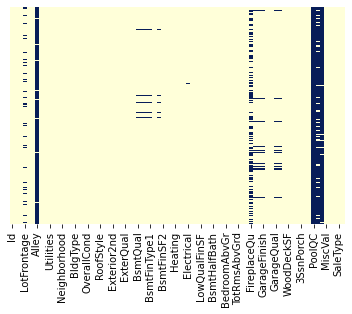

In [174]:

sns.heatmap(testdata.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [175]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [176]:
testdata.drop(['MoSold'],axis=1,inplace=True)
testdata.drop(['MiscVal'],axis=1,inplace=True)
testdata.drop(['MiscFeature'],axis=1,inplace=True)
testdata.drop(['Alley','PoolQC'],axis=1,inplace=True)

In [177]:
testdata.drop(['FireplaceQu','Fence'],axis=1,inplace=True)

testdata.drop(['Id'],axis=1,inplace=True)

In [178]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    247 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   Utilities      292 non-null    object 
 8   LotConfig      292 non-null    object 
 9   LandSlope      292 non-null    object 
 10  Neighborhood   292 non-null    object 
 11  Condition1     292 non-null    object 
 12  Condition2     292 non-null    object 
 13  BldgType       292 non-null    object 
 14  HouseStyle     292 non-null    object 
 15  OverallQual    292 non-null    int64  
 16  OverallCond    292 non-null    int64  
 17  YearBuilt      292 non-null    int64  
 18  YearRemodA

In [179]:
testdata.dropna(inplace=True)

In [180]:
testdata.shape

(223, 72)

In [181]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 291
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     223 non-null    int64  
 1   MSZoning       223 non-null    object 
 2   LotFrontage    223 non-null    float64
 3   LotArea        223 non-null    int64  
 4   Street         223 non-null    object 
 5   LotShape       223 non-null    object 
 6   LandContour    223 non-null    object 
 7   Utilities      223 non-null    object 
 8   LotConfig      223 non-null    object 
 9   LandSlope      223 non-null    object 
 10  Neighborhood   223 non-null    object 
 11  Condition1     223 non-null    object 
 12  Condition2     223 non-null    object 
 13  BldgType       223 non-null    object 
 14  HouseStyle     223 non-null    object 
 15  OverallQual    223 non-null    int64  
 16  OverallCond    223 non-null    int64  
 17  YearBuilt      223 non-null    int64  
 18  YearRemodA

## Checking for the duplicates

In [182]:
#  check  the duplicate
duplicate = testdata[testdata.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition


### Final test data set

In [183]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 291
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     223 non-null    int64  
 1   MSZoning       223 non-null    object 
 2   LotFrontage    223 non-null    float64
 3   LotArea        223 non-null    int64  
 4   Street         223 non-null    object 
 5   LotShape       223 non-null    object 
 6   LandContour    223 non-null    object 
 7   Utilities      223 non-null    object 
 8   LotConfig      223 non-null    object 
 9   LandSlope      223 non-null    object 
 10  Neighborhood   223 non-null    object 
 11  Condition1     223 non-null    object 
 12  Condition2     223 non-null    object 
 13  BldgType       223 non-null    object 
 14  HouseStyle     223 non-null    object 
 15  OverallQual    223 non-null    int64  
 16  OverallCond    223 non-null    int64  
 17  YearBuilt      223 non-null    int64  
 18  YearRemodA

## Applying the Label Encoder to the categorical_features

In [184]:
categorical_features  = [feature for feature in testdata.columns if testdata[feature].dtypes=="O"]
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [185]:
df2=le.fit_transform(testdata['LandContour'])
pd.Series(df2)
testdata['LandContour']=df2

df2=le.fit_transform(testdata['LotShape'])
pd.Series(df2)
testdata['LotShape']=df2

df2=le.fit_transform(testdata['Street'])
pd.Series(df2)
testdata['Street']=df2

df2=le.fit_transform(testdata['MSZoning'])
pd.Series(df2)
testdata['MSZoning']=df2

In [186]:
df2=le.fit_transform(testdata['Condition2'])
pd.Series(df2)
testdata['Condition2']=df2

df2=le.fit_transform(testdata['Condition1'])
pd.Series(df2)
testdata['Condition1']=df2

df2=le.fit_transform(testdata['Neighborhood'])
pd.Series(df2)
testdata['Neighborhood']=df2

df2=le.fit_transform(testdata['LandSlope'])
pd.Series(df2)
testdata['LandSlope']=df2

df2=le.fit_transform(testdata['LotConfig'])
pd.Series(df2)
testdata['LotConfig']=df2

df2=le.fit_transform(testdata['Utilities'])
pd.Series(df2)
testdata['Utilities']=df2

In [187]:
df2=le.fit_transform(testdata['MasVnrType'])
pd.Series(df2)
testdata['MasVnrType']=df2

df2=le.fit_transform(testdata['Exterior2nd'])
pd.Series(df2)
testdata['Exterior2nd']=df2

df2=le.fit_transform(testdata['Exterior1st'])
pd.Series(df2)
testdata['Exterior1st']=df2

df2=le.fit_transform(testdata['RoofMatl'])
pd.Series(df2)
testdata['RoofMatl']=df2

df2=le.fit_transform(testdata['RoofStyle'])
pd.Series(df2)
testdata['RoofStyle']=df2

df2=le.fit_transform(testdata['HouseStyle'])
pd.Series(df2)
testdata['HouseStyle']=df2

df2=le.fit_transform(testdata['BldgType'])
pd.Series(df2)
testdata['BldgType']=df2

In [188]:
df2=le.fit_transform(testdata['BsmtFinType2'])
pd.Series(df2)
testdata['BsmtFinType2']=df2

df2=le.fit_transform(testdata['BsmtFinType1'])
pd.Series(df2)
testdata['BsmtFinType1']=df2

df2=le.fit_transform(testdata['BsmtExposure'])
pd.Series(df2)
testdata['BsmtExposure']=df2

df2=le.fit_transform(testdata['BsmtCond'])
pd.Series(df2)
testdata['BsmtCond']=df2

df2=le.fit_transform(testdata['BsmtQual'])
pd.Series(df2)
testdata['BsmtQual']=df2

df2=le.fit_transform(testdata['Foundation'])
pd.Series(df2)
testdata['Foundation']=df2

df2=le.fit_transform(testdata['ExterCond'])
pd.Series(df2)
testdata['ExterCond']=df2

df2=le.fit_transform(testdata['ExterQual'])
pd.Series(df2)
testdata['ExterQual']=df2

In [189]:
df2=le.fit_transform(testdata['GarageType'])
pd.Series(df2)
testdata['GarageType']=df2

df2=le.fit_transform(testdata['Functional'])
pd.Series(df2)
testdata['Functional']=df2

df2=le.fit_transform(testdata['KitchenQual'])
pd.Series(df2)
testdata['KitchenQual']=df2

df2=le.fit_transform(testdata['Electrical'])
pd.Series(df2)
testdata['Electrical']=df2

df2=le.fit_transform(testdata['CentralAir'])
pd.Series(df2)
testdata['CentralAir']=df2

df2=le.fit_transform(testdata['HeatingQC'])
pd.Series(df2)
testdata['HeatingQC']=df2

df2=le.fit_transform(testdata['Heating'])
pd.Series(df2)
testdata['Heating']=df2

In [190]:
df2=le.fit_transform(testdata['SaleCondition'])
pd.Series(df2)
testdata['SaleCondition']=df2

df2=le.fit_transform(testdata['SaleType'])
pd.Series(df2)
testdata['SaleType']=df2

df2=le.fit_transform(testdata['PavedDrive'])
pd.Series(df2)
testdata['PavedDrive']=df2

df2=le.fit_transform(testdata['GarageCond'])
pd.Series(df2)
testdata['GarageCond']=df2

df2=le.fit_transform(testdata['GarageQual'])
pd.Series(df2)
testdata['GarageQual']=df2

df2=le.fit_transform(testdata['GarageFinish'])
pd.Series(df2)
testdata['GarageFinish']=df2

In [191]:
testdata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition
0,20,2,86.0,14157,1,0,1,0,0,0,...,2,178,51,0,0,0,0,2007,4,2
3,70,2,75.0,12000,1,3,0,0,4,0,...,2,0,0,0,0,0,0,2009,4,2
4,60,2,86.0,14598,1,0,3,0,1,0,...,2,100,18,0,0,0,0,2008,4,2
6,180,3,35.0,3675,1,3,3,0,4,0,...,2,0,28,0,0,0,0,2006,4,2
7,20,2,107.0,13891,1,3,3,0,4,0,...,2,0,102,0,0,0,0,2008,3,3


## Selecting same faetures that we selected on the train data set

In [192]:
new_XX=testdata[['Street','OverallQual','ExterQual','GrLivArea','BsmtQual','GarageCars','KitchenQual','GarageArea','FullBath','YearBuilt','1stFlrSF','GarageFinish','MSZoning','MasVnrArea','LotArea','GarageYrBlt','YearRemodAdd','TotRmsAbvGrd','TotalBsmtSF','Foundation']]

In [193]:
scalar = StandardScaler()
X_scalar = scalar.fit_transform(new_XX)

## Predicting the sales price for last 2 rows Using GBDT Model

In [194]:
new_XX.tail(2)

,Street,OverallQual,ExterQual,GrLivArea,BsmtQual,GarageCars,KitchenQual,GarageArea,FullBath,YearBuilt,1stFlrSF,GarageFinish,MSZoning,MasVnrArea,LotArea,GarageYrBlt,YearRemodAdd,TotRmsAbvGrd,TotalBsmtSF,Foundation
290,1,6,3,1664,3,2,3,420,2,1947,1004,2,3,0.0,5000,1950.0,1950,7,1004,1
291,1,6,3,987,3,1,3,264,1,1973,483,2,3,408.0,1953,1973.0,1973,5,483,1


In [195]:
print ('predict SalePrice is',gbdt_clf.predict (([[1,6,3,1664,3,2,3,420,2,1947,1004,2,3,0.0,5000,1950.0,1950,7,1004,1]])))

predict SalePrice is [319451.99837605]


In [196]:
print ('predict SalePrice is',gbdt_clf.predict (([[1,6,3,987,3,1,3,264,1,1947,1004,2,3,408.0,1953,1973.0,1973,5,483,1]])))

predict SalePrice is [306993.47975999]


## Predicting for all the rows on test data Using GBDT Model

In [197]:
y_pred = gbdt_clf.predict(new_XX)

In [198]:
y_pred.shape

(223,)

In [199]:
y_pred

array([302550.09220108, 319451.99837605, 302550.09220108, 302550.09220108,
       306993.47975999, 302550.09220108, 316719.9648186 , 319451.99837605,
       306993.47975999, 302550.09220108, 316719.9648186 , 319451.99837605,
       306993.47975999, 319451.99837605, 319451.99837605, 306993.47975999,
       316719.9648186 , 319451.99837605, 319451.99837605, 302550.09220108,
       306993.47975999, 316719.9648186 , 315008.61081714, 306993.47975999,
       316719.9648186 , 319451.99837605, 306993.47975999, 306993.47975999,
       319451.99837605, 319451.99837605, 302550.09220108, 319451.99837605,
       319451.99837605, 316719.9648186 , 319451.99837605, 316719.9648186 ,
       306993.47975999, 296860.81236236, 319451.99837605, 319451.99837605,
       316719.9648186 , 306993.47975999, 319451.99837605, 315008.61081714,
       319451.99837605, 306993.47975999, 319451.99837605, 319451.99837605,
       300340.23290602, 306993.47975999, 319451.99837605, 319451.99837605,
       319451.99837605, 3

In [200]:
new_XX

,Street,OverallQual,ExterQual,GrLivArea,BsmtQual,GarageCars,KitchenQual,GarageArea,FullBath,YearBuilt,1stFlrSF,GarageFinish,MSZoning,MasVnrArea,LotArea,GarageYrBlt,YearRemodAdd,TotRmsAbvGrd,TotalBsmtSF,Foundation
0,1,9,2,1922,0,3,2,676,2,2005,1922,0,2,200.0,14157,2005.0,2006,8,1922,2
3,1,7,3,1564,3,1,1,234,1,1941,860,2,2,0.0,12000,1941.0,1950,7,704,1
4,1,6,2,1933,2,3,2,668,2,2007,894,0,2,74.0,14598,2007.0,2007,9,894,2
6,1,5,3,1072,2,2,3,525,1,2005,1072,0,3,80.0,3675,2005.0,2005,5,547,2
7,1,8,2,1710,0,3,2,866,2,2007,1710,1,2,436.0,13891,2007.0,2008,6,1710,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,1,6,3,1425,3,2,3,576,2,1964,1425,1,2,272.0,10175,1964.0,1964,7,1425,1
287,1,8,3,1563,2,3,2,758,2,2007,1563,1,2,468.0,10206,2007.0,2007,6,1563,2
288,1,5,3,990,2,2,3,672,1,1994,990,2,2,0.0,9245,1996.0,1995,5,990,2
290,1,6,3,1664,3,2,3,420,2,1947,1004,2,3,0.0,5000,1950.0,1950,7,1004,1


## Adding predicted total sale value to the dataset

In [201]:
new_XX['Pred value'] = y_pred

In [202]:
new_XX.head()

,Street,OverallQual,ExterQual,GrLivArea,BsmtQual,GarageCars,KitchenQual,GarageArea,FullBath,YearBuilt,...,GarageFinish,MSZoning,MasVnrArea,LotArea,GarageYrBlt,YearRemodAdd,TotRmsAbvGrd,TotalBsmtSF,Foundation,Pred value
0,1,9,2,1922,0,3,2,676,2,2005,...,0,2,200.0,14157,2005.0,2006,8,1922,2,302550.092201
3,1,7,3,1564,3,1,1,234,1,1941,...,2,2,0.0,12000,1941.0,1950,7,704,1,319451.998376
4,1,6,2,1933,2,3,2,668,2,2007,...,0,2,74.0,14598,2007.0,2007,9,894,2,302550.092201
6,1,5,3,1072,2,2,3,525,1,2005,...,0,3,80.0,3675,2005.0,2005,5,547,2,302550.092201
7,1,8,2,1710,0,3,2,866,2,2007,...,1,2,436.0,13891,2007.0,2008,6,1710,2,306993.479760
